## Exercise 1

In [43]:
install.packages("gridExtra")

package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\scumb\AppData\Local\Temp\RtmpIrjFrE\downloaded_packages


In [44]:
library(rvest)
library(tidyverse)
library(ggplot2)
library(lubridate)
library(dplyr)
library(tidyr)
library(gridExtra)


Caricamento pacchetto: 'gridExtra'


Il seguente oggetto è mascherato da 'package:dplyr':

    combine




### Uniform distribution

Study the binomial inference assuming a **uniform distribution** as a prior.

In [7]:
# Set the parameters
y <- 7
n <- 20
a <- 1
b <- 1

# Calculate the likelihood
likelihood <- dbinom(y, n, seq(0, 1, 0.01))

# Generate samples from the posterior distribution
posterior_samples <- rbeta(10000, y + a, n - y + b)

In [8]:
# Calculate the mean and standard deviation of the posterior samples
posterior_mean <- mean(posterior_samples)
posterior_sd <- sd(posterior_samples)

# Print the results
cat("Posterior Mean:", posterior_mean, "\n")
cat("Posterior SD:", posterior_sd)

Posterior Mean: 0.3656709 
Posterior SD: 0.1004232



|Parameter                |Value                                 |
|:------------------------|:-------------------------------------|
|Posterior Mean           |0.365670863826274                     |
|Posterior SD             |0.100423213510685                     |
|95% Credibility Interval |0.182979116976194 - 0.570828905088394 |

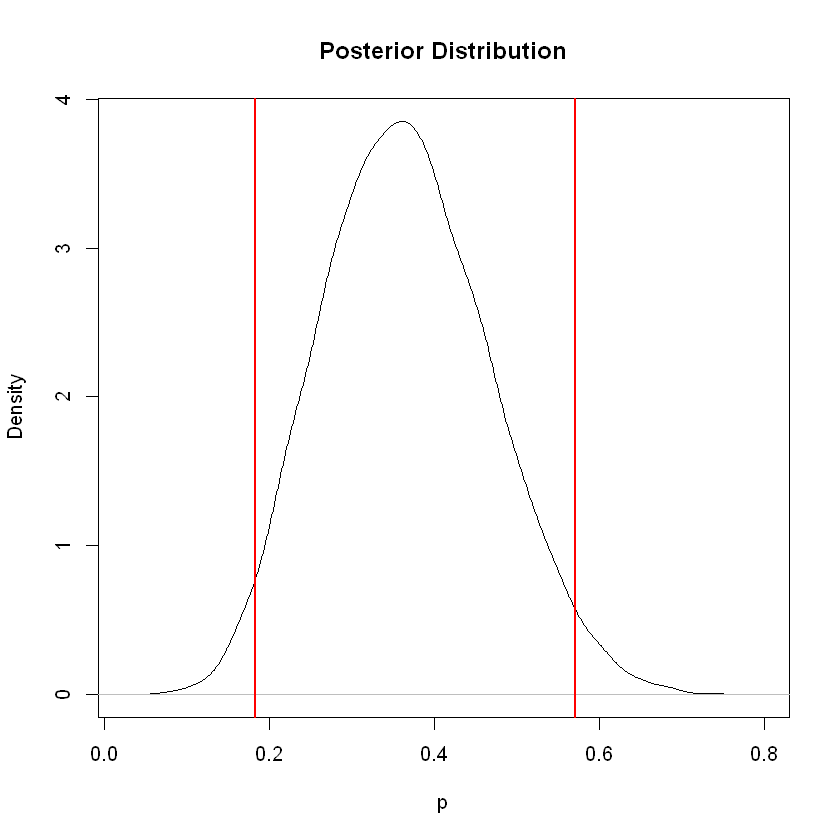

In [9]:
# Calculate the 95% credibility interval
credibility_interval <- quantile(posterior_samples, c(0.025, 0.975))

# Create a density plot of the posterior samples
plot(density(posterior_samples), main = "Posterior Distribution", xlab = "p")

# Add vertical lines to the histogram at the limits of the credibility interval
abline(v = credibility_interval, col = "red", lwd = 2)

# Create a summary table
library(knitr)
summary_table <- data.frame(
    "Parameter" = c("Posterior Mean", "Posterior SD", "95% Credibility Interval"),
    "Value" = c(mean(posterior_samples), sd(posterior_samples), paste(credibility_interval, collapse = " - "))
)
kable(summary_table)

### Jeffrey's prior

Study the binomial inference assuming a **Jeffrey**'s prior.

In [10]:
# Set the parameters
y <- 7
n <- 20
a <- 0.5
b <- 0.5

# Calculate the likelihood
likelihood <- dbinom(y, n, seq(0, 1, 0.01))

# Generate samples from the posterior distribution
posterior_samples <- rbeta(10000, y + a, n - y + b)

# Calculate the mean and standard deviation of the posterior samples
posterior_mean <- mean(posterior_samples)
posterior_sd <- sd(posterior_samples)

# Print the results
cat("Posterior Mean:", posterior_mean, "\n")
cat("Posterior SD:", posterior_sd)

Posterior Mean: 0.3563322 
Posterior SD: 0.1015857



|Parameter                |Value                                 |
|:------------------------|:-------------------------------------|
|Posterior Mean           |0.356332231878228                     |
|Posterior SD             |0.101585671675602                     |
|95% Credibility Interval |0.172953683192801 - 0.567126717189499 |

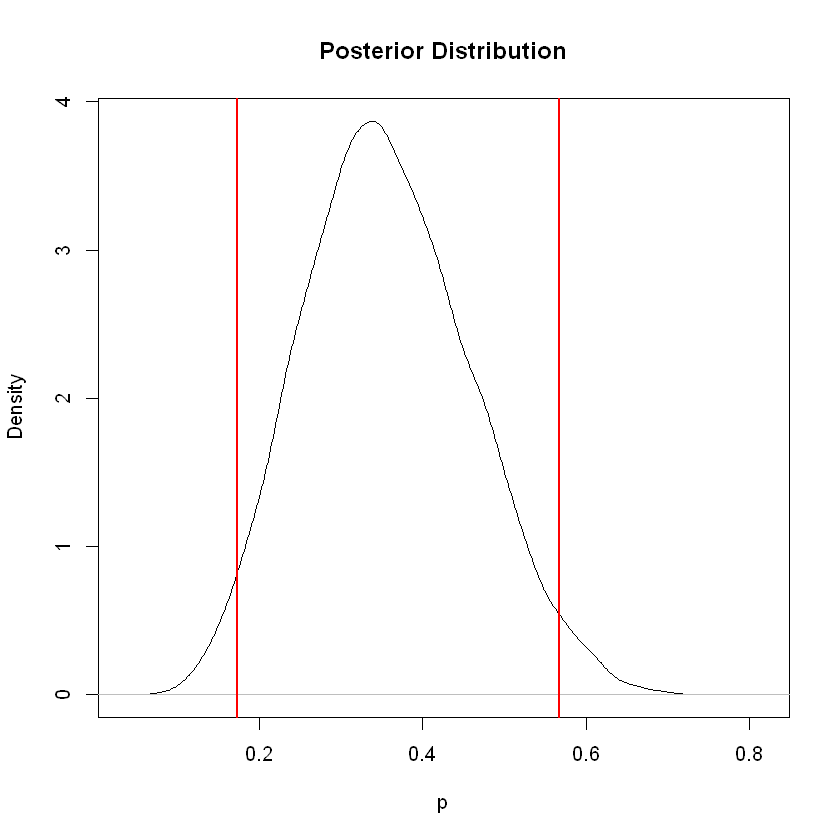

In [11]:
# Calculate the 95% credibility interval
credibility_interval <- quantile(posterior_samples, c(0.025, 0.975))

# Create a density plot of the posterior samples
plot(density(posterior_samples), main = "Posterior Distribution", xlab = "p")

# Add vertical lines to the density plot at the limits of the credibility interval
abline(v = credibility_interval, col = "red", lwd = 2)

# Create a summary table
library(knitr)
summary_table <- data.frame(
    "Parameter" = c("Posterior Mean", "Posterior SD", "95% Credibility Interval"),
    "Value" = c(mean(posterior_samples), sd(posterior_samples), paste(credibility_interval, collapse = " - "))
)
kable(summary_table)

### Step function

Study the binomial inference assuming the following prior:
$g(\pi)$.

In [13]:
# Set the parameters
y <- 7 # Observed data
n <- 20 # Sample size

# Define the prior distribution
prior <- function(p) {
    ifelse(p <= 0.2, p,
           ifelse(p <= 0.3, 0.2,
                  ifelse(p <= 0.5, 0.5 - p, 0)))
}

# Define the likelihood function
likelihood <- function(p) {
    dbinom(y, n, p)
}

# Define the posterior distribution
posterior <- function(p) {
    likelihood(p) * prior(p)
}

# Create a sequence of p values
p_seq <- seq(0, 1, length.out = 1000)

# Calculate the posterior distribution for each value of p
posterior_values <- sapply(p_seq, posterior)

# Normalize the posterior distribution
posterior_values <- posterior_values / sum(posterior_values)

# Calculate the mean and standard deviation of the posterior distribution
posterior_mean <- sum(p_seq * posterior_values)
posterior_var <- sum((p_seq - posterior_mean)^2 * posterior_values)
posterior_sd <- sqrt(posterior_var)

# Print the results
cat("Posterior Mean:", posterior_mean, "\n")
cat("Posterior SD:", posterior_sd)

Posterior Mean: 0.3120456 
Posterior SD: 0.07070207



|Parameter                |Value              |
|:------------------------|:------------------|
|Posterior Mean           |0.312045621724863  |
|Posterior SD             |0.0707020651433302 |
|95% Credibility Interval |0.176 - 0.448      |

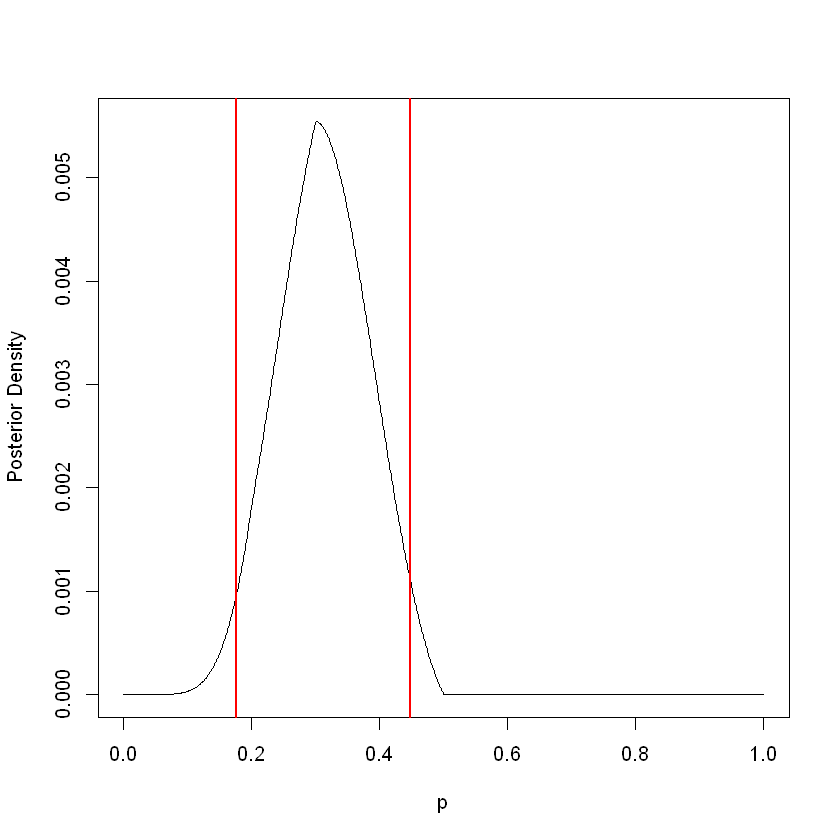

In [14]:
# Calculate the cumulative sum of the posterior distribution
cumulative_posterior <- cumsum(posterior_values)

# Find the values of p for which the cumulative sum of the posterior distribution reaches 0.025 and 0.975
lower_limit <- min(which(cumulative_posterior >= 0.025)) / length(cumulative_posterior)
upper_limit <- min(which(cumulative_posterior >= 0.975)) / length(cumulative_posterior)
credibility_interval <- c(lower_limit, upper_limit)

# Create a plot of the posterior distribution
plot(p_seq, posterior_values, type = "l", xlab = "p", ylab = "Posterior Density")

# Add vertical lines to the plot at the limits of the credibility interval
abline(v = credibility_interval, col = "red", lwd = 2)

# Create a summary table
library(knitr)
summary_table <- data.frame(
    "Parameter" = c("Posterior Mean", "Posterior SD", "95% Credibility Interval"),
    "Value" = c(posterior_mean, posterior_sd, paste(credibility_interval, collapse = " - "))
)
kable(summary_table)

## Exercise 2

Find the posterior distribution for $\pi$ assuming a uniform prior distribution.

Posterior Mean: 0.1525424 
Posterior SD: 0.03295951

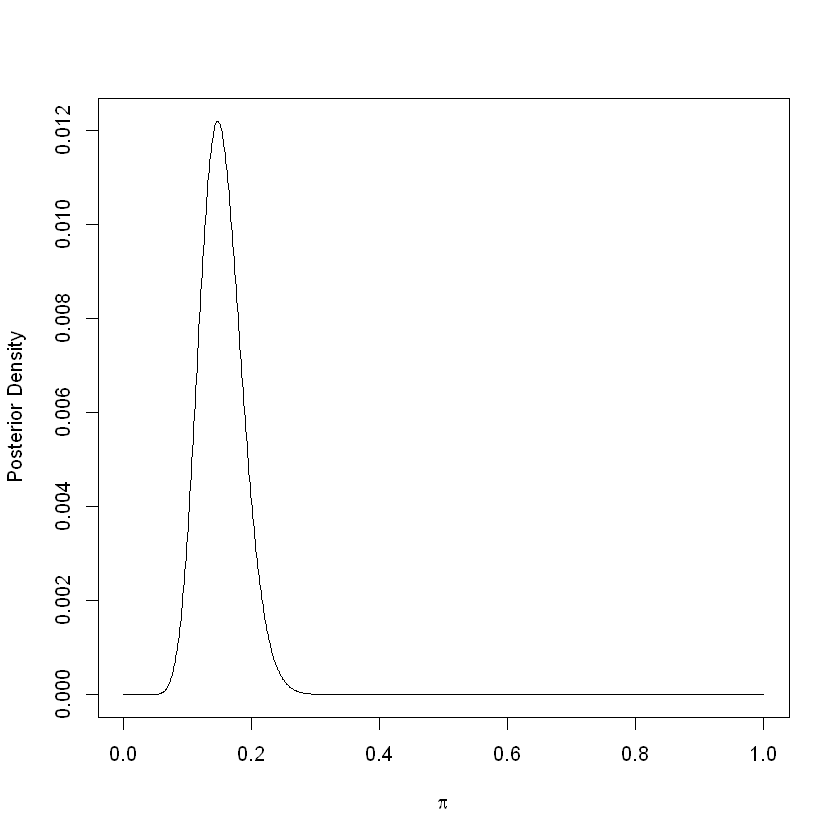

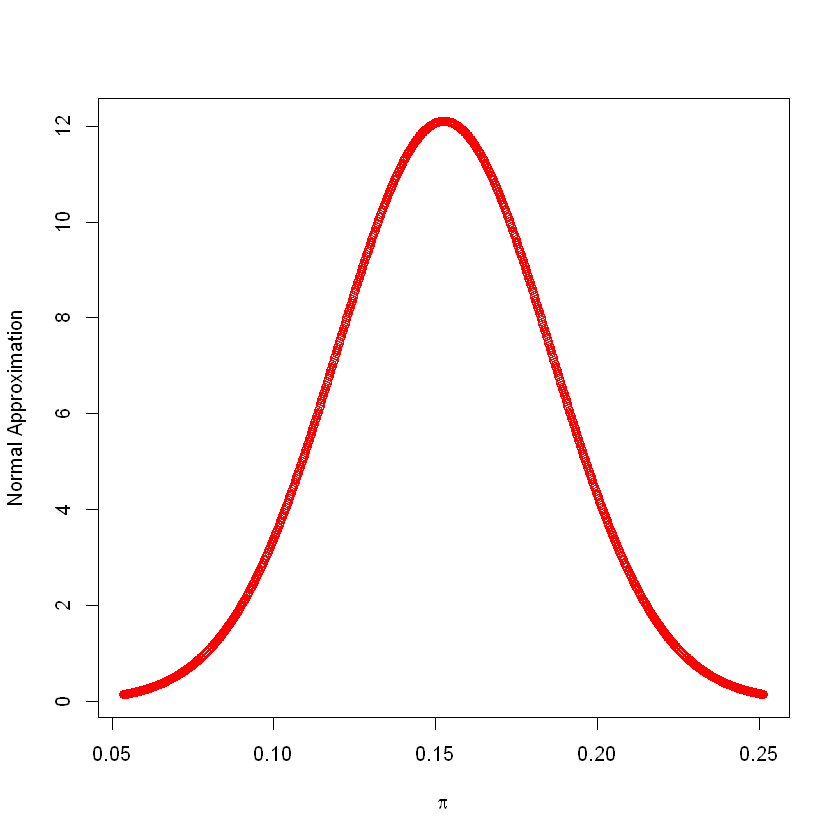

In [5]:
# Set the parameters
y <- 17 # Number of samples that contained Giardia cystis
n <- 116 # Total number of samples

# Define the prior distribution (uniform)
prior <- function(p) {
    1
}

# Define the likelihood function (binomial)
likelihood <- function(p) {
    dbinom(y, n, p)
}

# Define the posterior distribution
posterior <- function(p) {
    likelihood(p) * prior(p)
}

# Create a sequence of p values
p_seq <- seq(0, 1, length.out = 1000)

# Calculate the posterior distribution for each value of p
posterior_values <- sapply(p_seq, posterior)

# Normalize the posterior distribution
posterior_values <- posterior_values / sum(posterior_values)

# Calculate the mean and standard deviation of the posterior distribution
posterior_mean <- sum(p_seq * posterior_values)
posterior_var <- sum((p_seq - posterior_mean)^2 * posterior_values)
posterior_sd <- sqrt(posterior_var)

# Print the results
cat("Posterior Mean:", posterior_mean, "\n")
cat("Posterior SD:", posterior_sd)

# Create a plot of the posterior distribution
plot(p_seq, posterior_values, type = "l", xlab = expression(pi), ylab = "Posterior Density")

# Find a normal approximation for the posterior g(pi|y)
x_seq <- seq(posterior_mean - 3 * sqrt(posterior_var), posterior_mean + 3 * sqrt(posterior_var), length.out = 1000)
normal_approximation <- dnorm(x_seq, mean = posterior_mean, sd = sqrt(posterior_var))

# Add the normal approximation to the plot
plot(x_seq, normal_approximation, col = "red", xlab = expression(pi), ylab = "Normal Approximation")

Distribution,Lower,Upper
Posterior,0.02404905,0.9759510
Normal Approximation,0.08794292,0.2171418


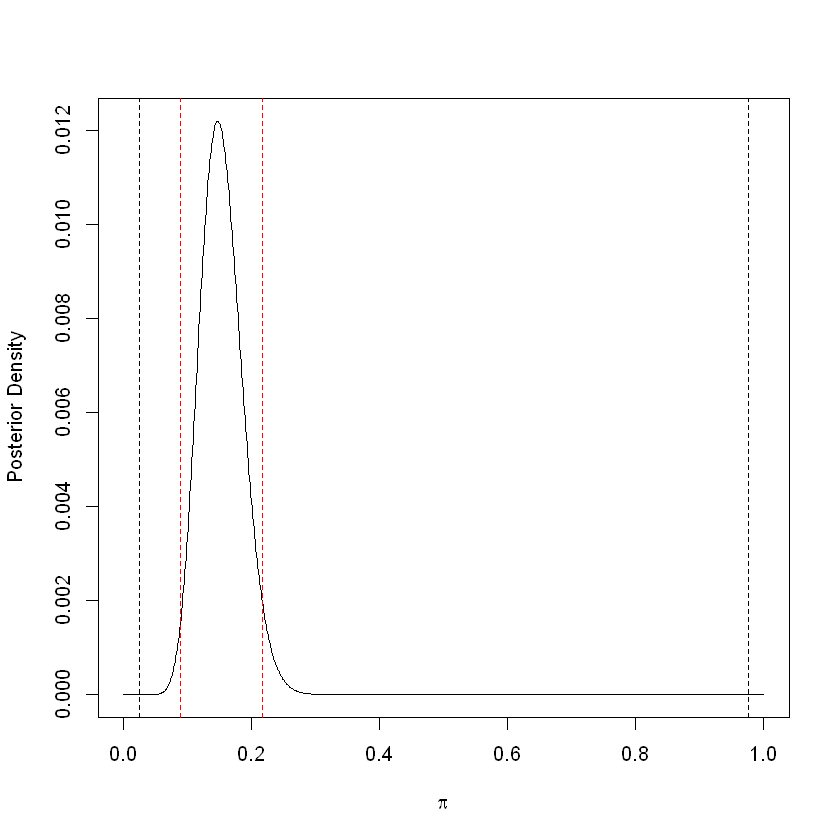

In [37]:
# Compute a 95% credibility interval for the original posterior distribution
posterior_ci <- quantile(p_seq, probs = c(0.025, 0.975), type = 6, names = FALSE)

# Compute a 95% credibility interval for the normal approximation
normal_ci <- qnorm(p = c(0.025, 0.975), mean = posterior_mean, sd = posterior_sd)

# Create a summary table
summary_table <- data.frame(
    Distribution = c("Posterior", "Normal Approximation"),
    Lower = c(posterior_ci[1], normal_ci[1]),
    Upper = c(posterior_ci[2], normal_ci[2])
)

# Print the summary table
summary_table

# Create a plot of the posterior distribution
plot(p_seq, posterior_values, type = "l", xlab = expression(pi), ylab = "Posterior Density")

# Add the limits to the plot of the posterior distributions
abline(v = posterior_ci, lty = 2)
abline(v = normal_ci, lty = 2, col = "red")

Find the posterior distribution for $\pi$ assuming a Beta(1,4) prior distribution.

Posterior Mean: 0.1487603 
Posterior SD: 0.03221733

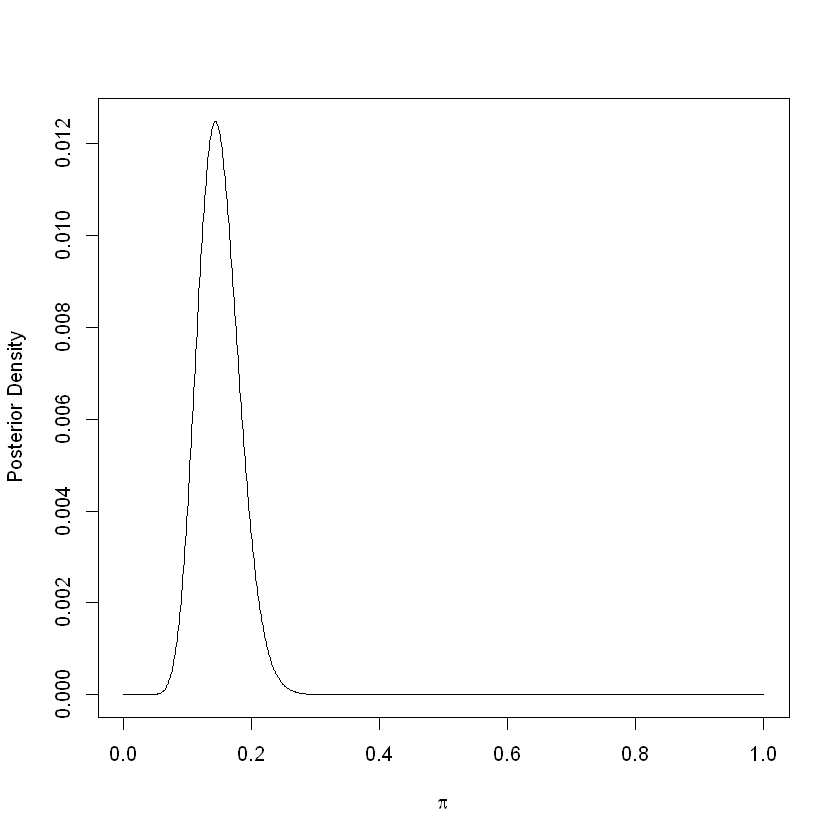

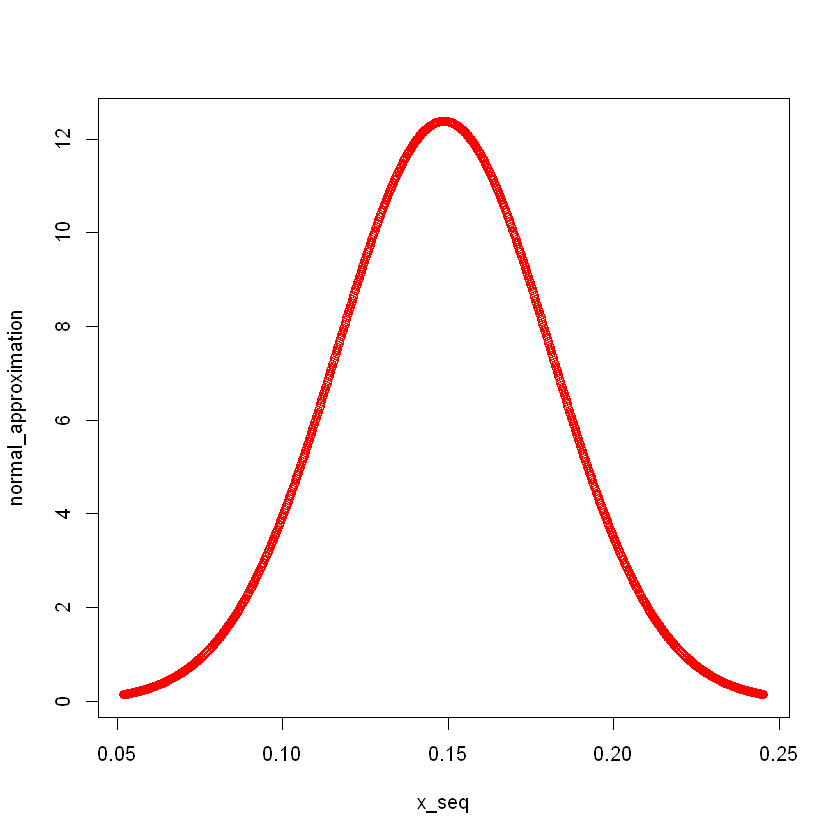

In [6]:
# Define the prior distribution (Beta(1, 4))
prior <- function(p) {
    dbeta(p, 1, 4)
}

# Define the likelihood function (binomial)
likelihood <- function(p) {
    dbinom(y, n, p)
}

# Define the posterior distribution
posterior <- function(p) {
    likelihood(p) * prior(p)
}

# Create a sequence of p values
p_seq <- seq(0, 1, length.out = 1000)

# Calculate the posterior distribution for each value of p
posterior_values <- sapply(p_seq, posterior)

# Normalize the posterior distribution
posterior_values <- posterior_values / sum(posterior_values)

# Calculate the mean and standard deviation of the posterior distribution
posterior_mean <- sum(p_seq * posterior_values)
posterior_var <- sum((p_seq - posterior_mean)^2 * posterior_values)
posterior_sd <- sqrt(posterior_var)

# Print the results
cat("Posterior Mean:", posterior_mean, "\n")
cat("Posterior SD:", posterior_sd)

# Create a plot of the posterior distribution
plot(p_seq, posterior_values, type = "l", xlab = expression(pi), ylab = "Posterior Density")

# Find a normal approximation for the posterior g(pi|y)
x_seq <- seq(posterior_mean - 3 * posterior_sd, posterior_mean + 3 * posterior_sd, length.out = 1000)
normal_approximation <- dnorm(x_seq, mean = posterior_mean, sd = posterior_sd)

# Add the normal approximation to the plot
plot(x_seq, normal_approximation, col = "red")

Distribution,Lower,Upper
Posterior,0.02404905,0.9759510
Normal Approximation,0.08561552,0.2119051


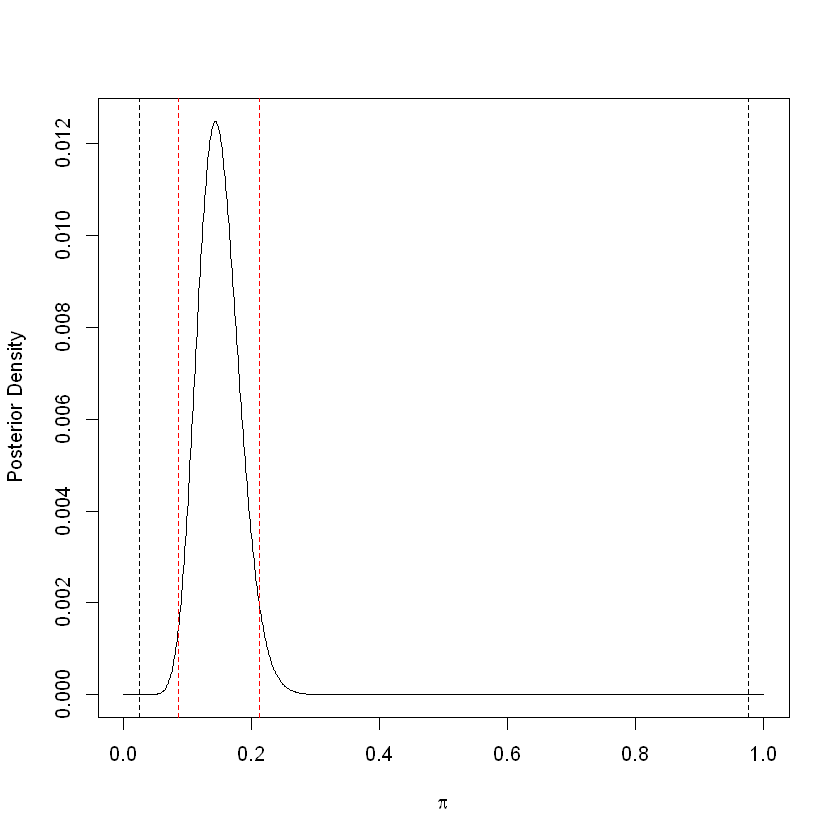

In [40]:
# Compute a 95% credibility interval for the original posterior distribution
posterior_ci <- quantile(p_seq, probs = c(0.025, 0.975), type = 6, names = FALSE)

# Compute a 95% credibility interval for the normal approximation
normal_ci <- qnorm(p = c(0.025, 0.975), mean = posterior_mean, sd = posterior_sd)

# Create a summary table
summary_table <- data.frame(
    Distribution = c("Posterior", "Normal Approximation"),
    Lower = c(posterior_ci[1], normal_ci[1]),
    Upper = c(posterior_ci[2], normal_ci[2])
)
# Print the summary table
summary_table

# Create a plot of the posterior distribution
plot(p_seq, posterior_values, type = "l", xlab = expression(pi), ylab = "Posterior Density")

# Add the limits to the plot of the posterior distributions
abline(v = posterior_ci, lty = 2)
abline(v = normal_ci, lty = 2, col = "red")

## Exercise 3

## a)

In [18]:
# Define the number of heads and tails
n <- 30
k <- sum(c(0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
           1 ,1))

In [31]:
# Define the likelihood function
likelihood <- function(p) {
    dbinom(k,n,p)
}

# Define the flat prior
prior_flat <- function(p) {
    dunif(p)
}

# Define the beta prior with shape parameters
prior_beta <- function(p) {
    dbeta(p,2.7,6.3)
}

# Define the posterior distribution with flat prior
posterior_flat <- function(p) {
    likelihood(p)*prior_flat(p)
}


# Define the posterior distribution with beta prior
posterior_beta <- function(p) {
    likelihood(p)*prior_beta(p)
}

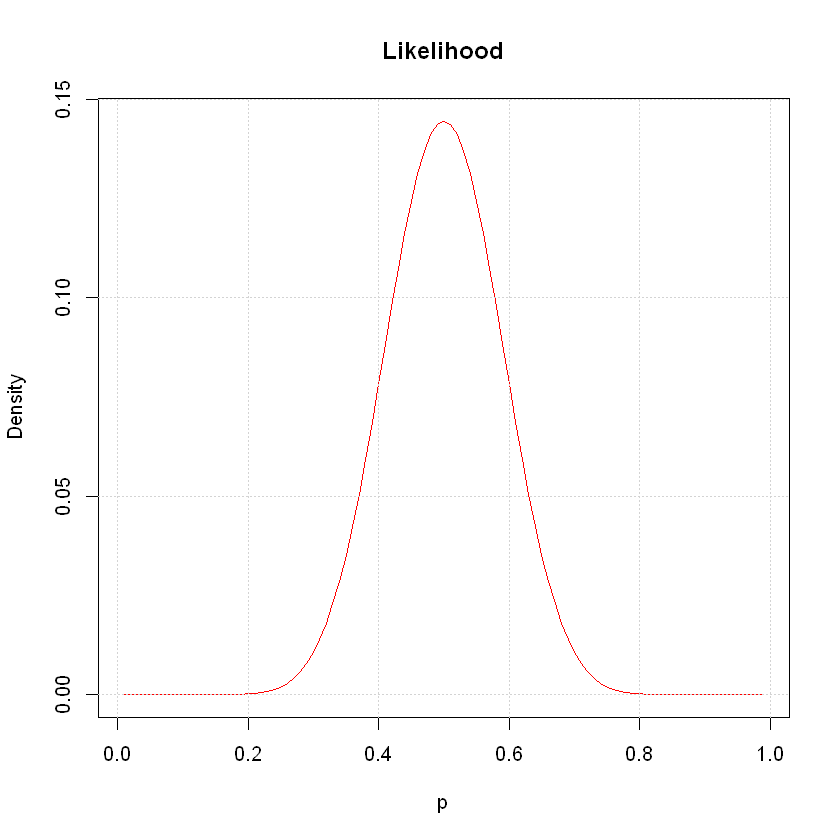

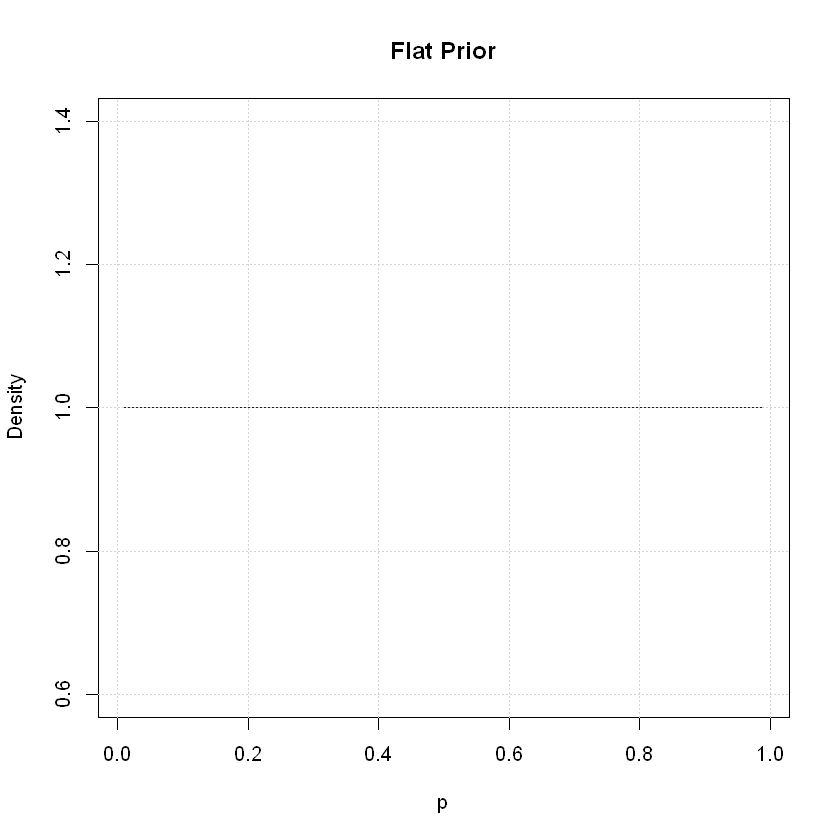

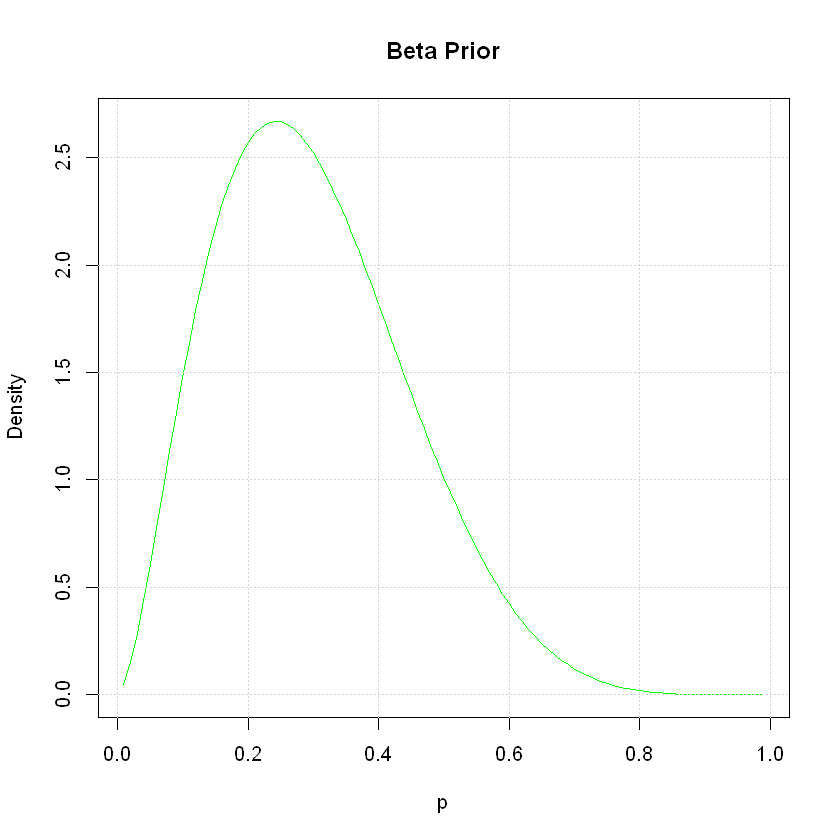

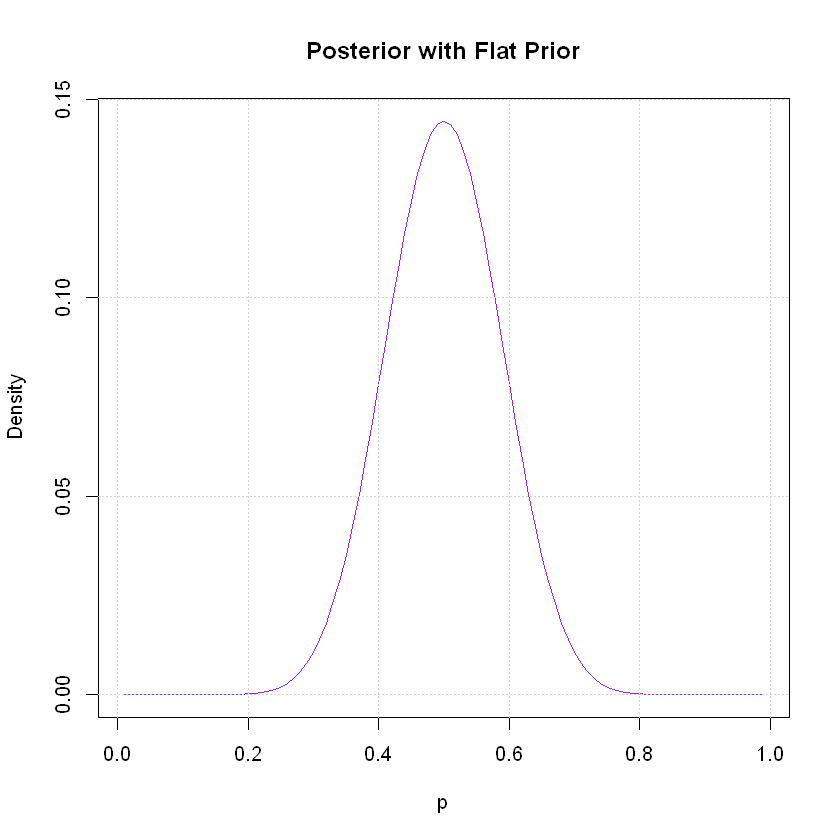

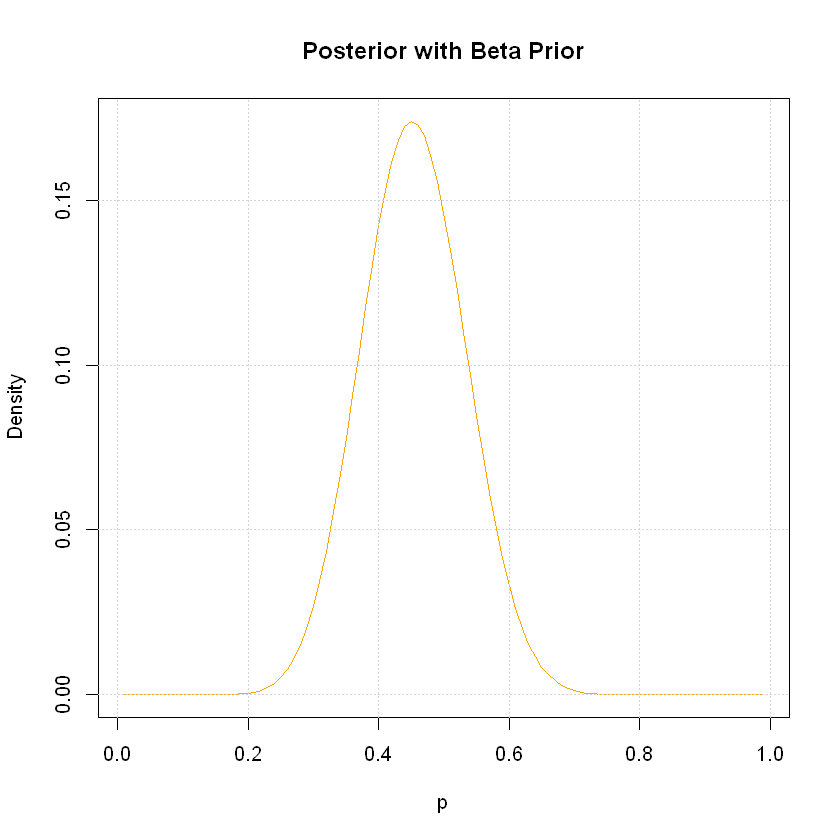

In [32]:
#Create a sequence of values of p with increment 0.01
p <- seq(0.01,.99,.01)

# Plot the likelihood function
plot(p,sapply(p,function(x) likelihood(x)),type="l",col="red",xlab="p",ylab="Density",main="Likelihood")
grid()

# Plot the flat prior
plot(p,sapply(p,function(x) prior_flat(x)),type="l",col="blue",xlab="p",ylab="Density",main="Flat Prior")
grid()

# Plot the beta prior
plot(p,sapply(p,function(x) prior_beta(x)),type="l",col="green",xlab="p",ylab="Density",main="Beta Prior")
grid()
              
# Plot the posterior distribution with flat prior
plot(p,sapply(p,function(x) posterior_flat(x)),type="l",col="purple",xlab="p",ylab="Density",main="Posterior with Flat Prior")
grid()

# Plot the posterior distribution with beta prior
plot(p,sapply(p,function(x) posterior_beta(x)),type="l",col="orange",xlab="p",ylab="Density",main="Posterior with Beta Prior")
grid()

## b)

In [27]:
# Find the most probable value for p with flat prior
p_flat <- p[which.max(sapply(p,function(x) posterior_flat(x)))]
cat("The most probable value for p with flat prior is: ", p_flat,"\n")

# Find the most probable value for p with beta prior
p_beta <- p[which.max(sapply(p,function(x) posterior_beta(x)))]
cat("The most probable value for p with beta prior is: ", p_beta,"\n")

The most probable value for p with flat prior is:  0.5 
The most probable value for p with beta prior is:  0.45 


The credibility interval for flat prior is: [ 0.330606 ,  0.669394 ]


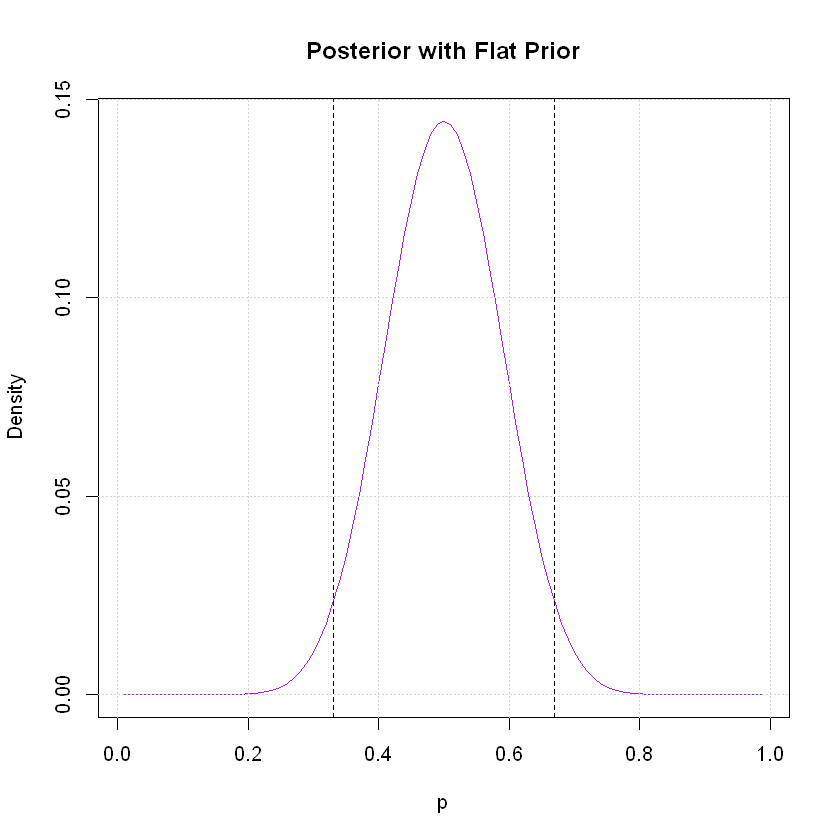

In [38]:
# Define the shape parameters for the flat prior (i.e., uniform distribution)
alpha <- 1
beta <- 1

# Calculate the shape parameters for the posterior distribution
alpha_post <- alpha + k
beta_post <- beta + n - k

# Find the credibility interval for flat prior
alpha_level <- .025
lower_flat <- qbeta(alpha_level,alpha_post,beta_post)
upper_flat <- qbeta(1-alpha_level,alpha_post,beta_post)

cat("The credibility interval for flat prior is: [",lower_flat,", ",upper_flat,"]\n")

# Plot the posterior distribution with flat prior
p <- seq(0.01,.99,.01)
plot(p,sapply(p,function(x) posterior_flat(x)),type="l",col="purple",xlab="p",ylab="Density",main="Posterior with Flat Prior")
grid()

# Add vertical lines to show the credibility interval
abline(v=lower_flat,lty=2)
abline(v=upper_flat,lty=2)

The credibility interval for beta prior is: [ 0.3026937 ,  0.6094861 ]


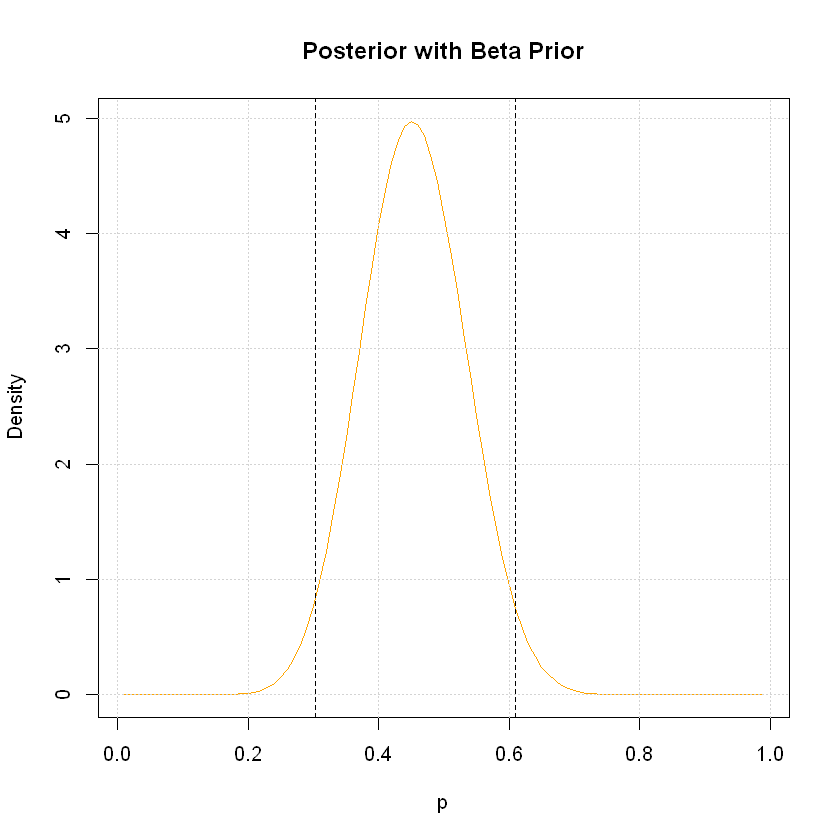

In [37]:
# Define the shape parameters for the beta prior
alpha <- 2.7
beta <- 6.3

# Calculate the shape parameters for the posterior distribution
alpha_post <- alpha + k
beta_post <- beta + n - k

# Find the credibility interval for beta prior
lower_beta <- qbeta(alpha_level,alpha_post,beta_post)
upper_beta <- qbeta(1-alpha_level,alpha_post,beta_post)

cat("The credibility interval for beta prior is: [",lower_beta,", ",upper_beta,"]\n")

# Plot the posterior distribution with beta prior
plot(p,dbeta(p,alpha_post,beta_post),type="l",col="orange",xlab="p",ylab="Density",main="Posterior with Beta Prior")
grid()

# Add vertical lines to show the credibility interval
abline(v=lower_beta,lty=2)
abline(v=upper_beta,lty=2)

## c)

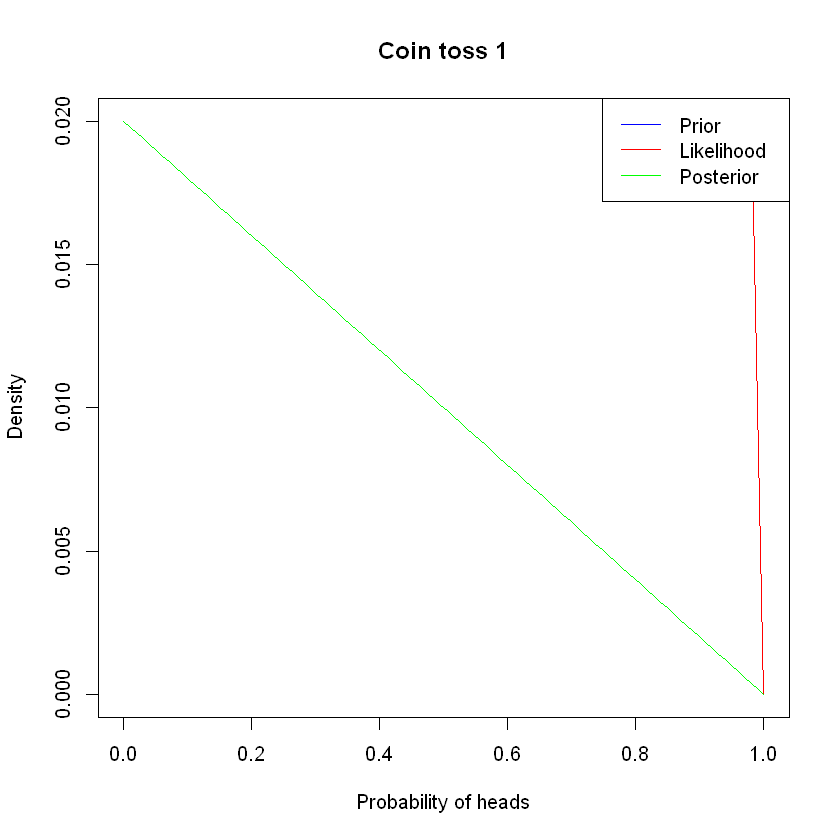

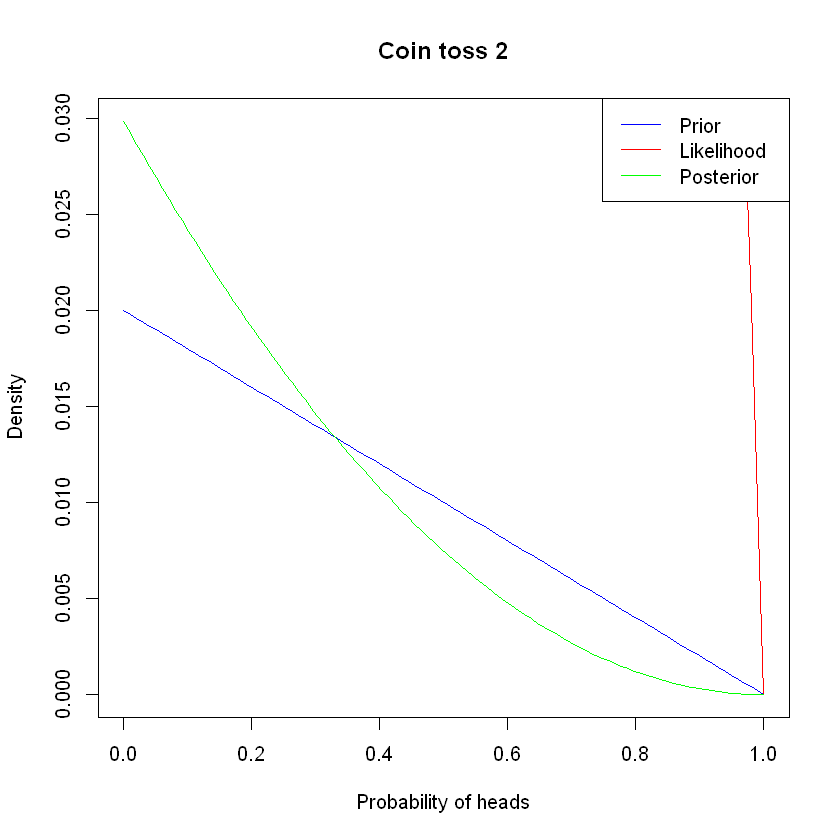

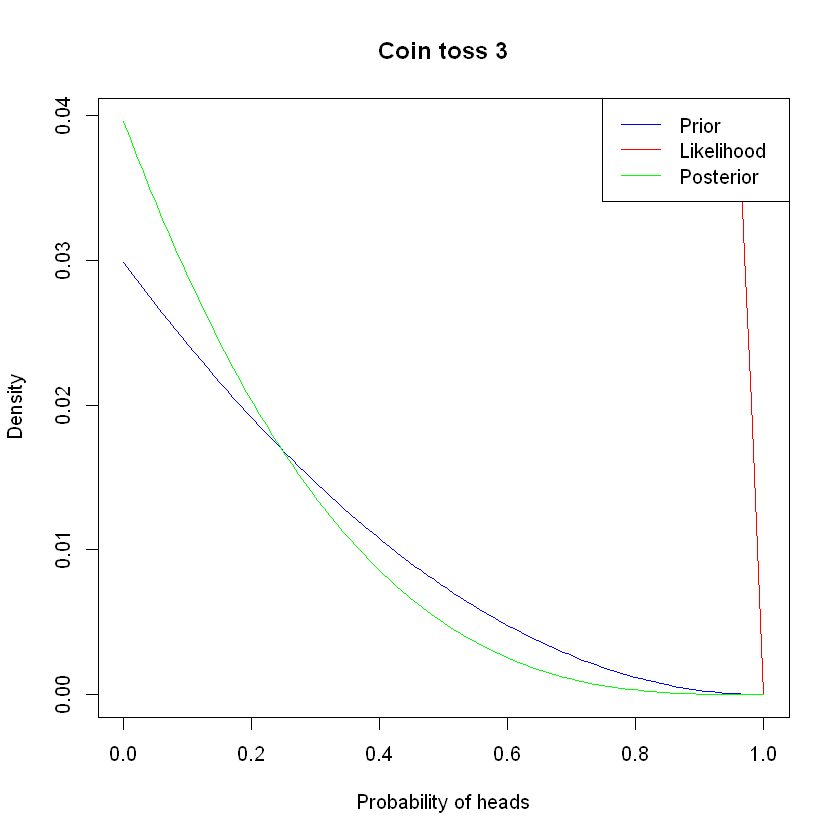

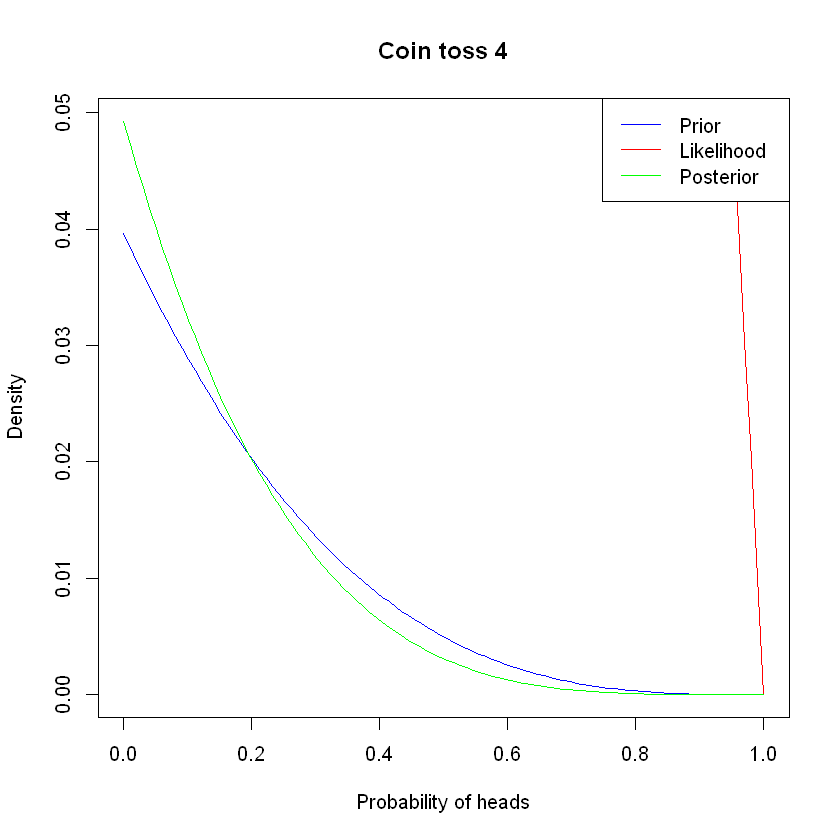

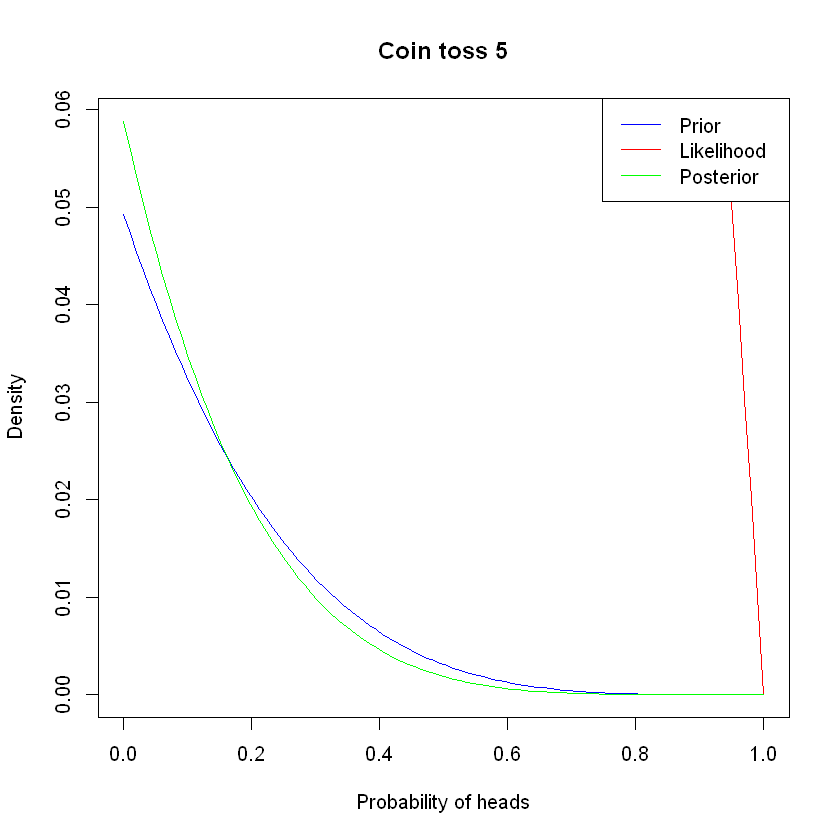

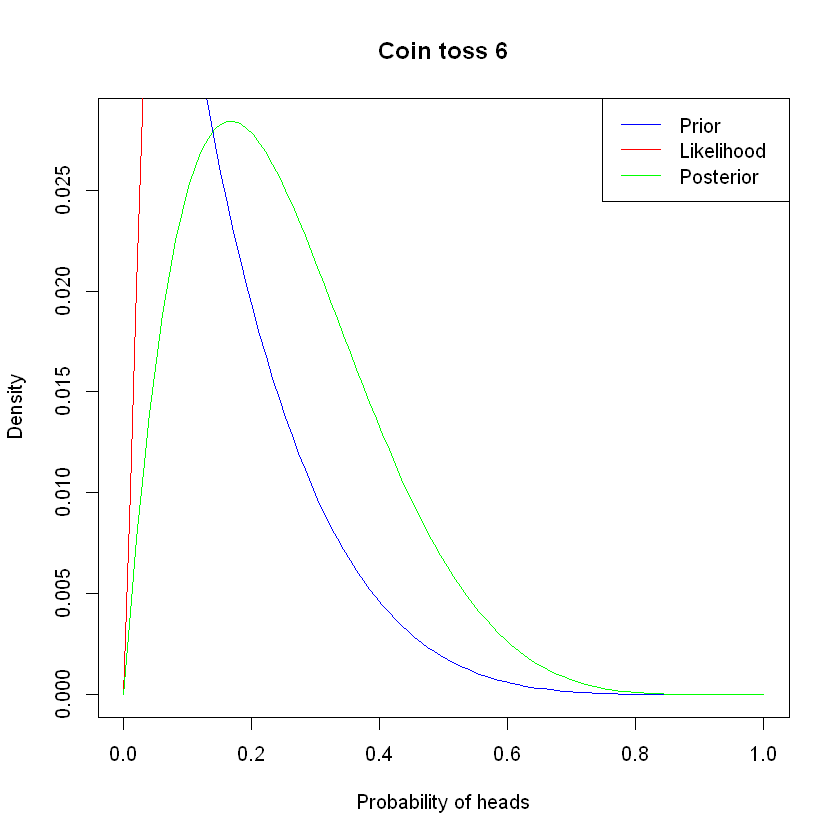

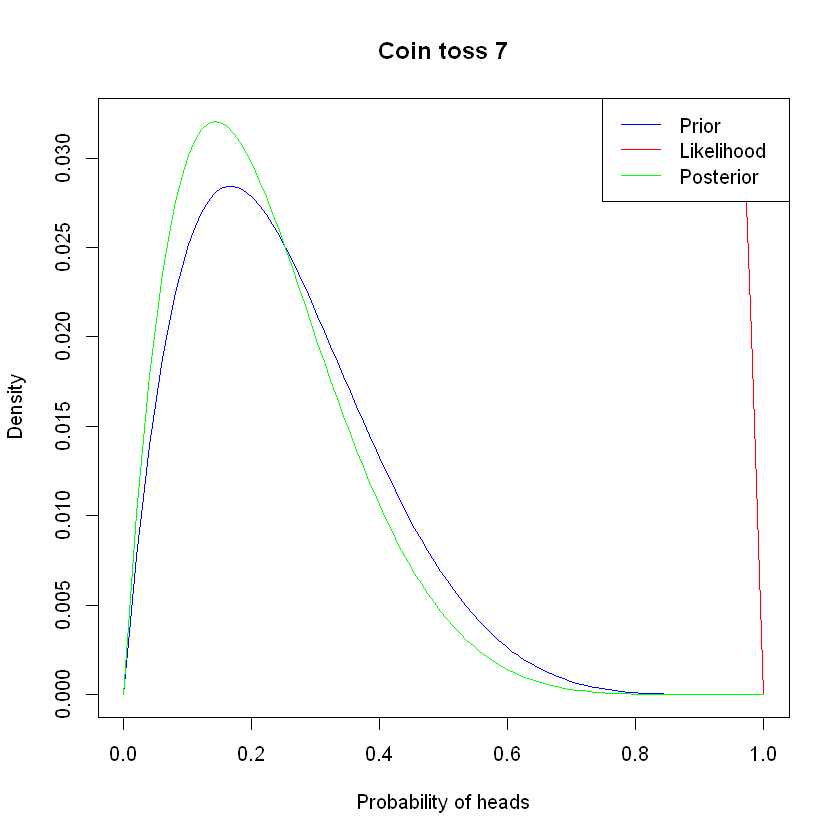

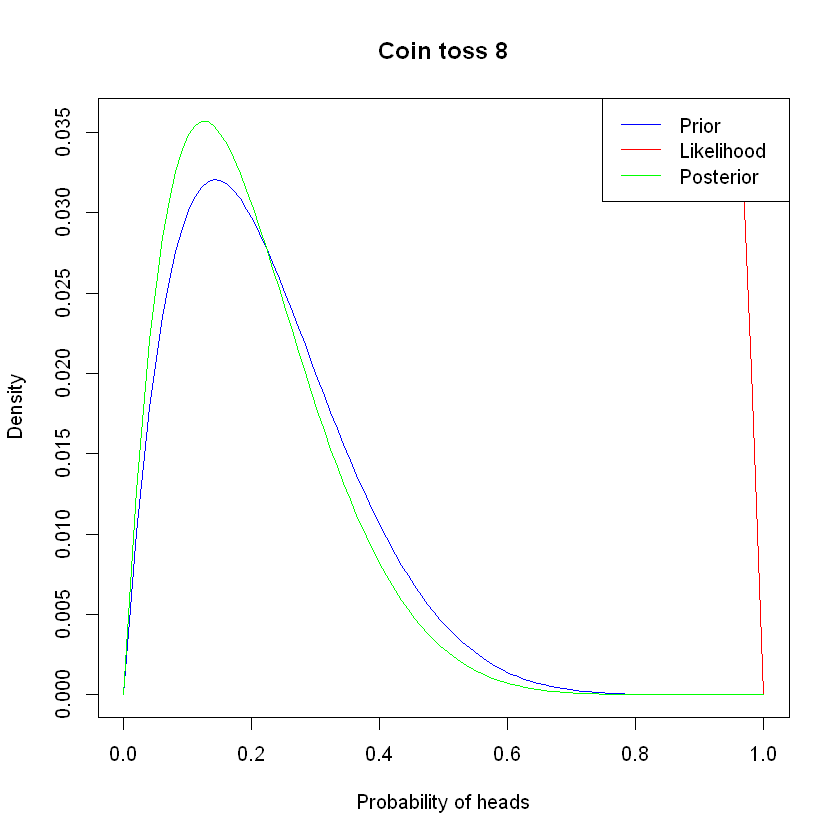

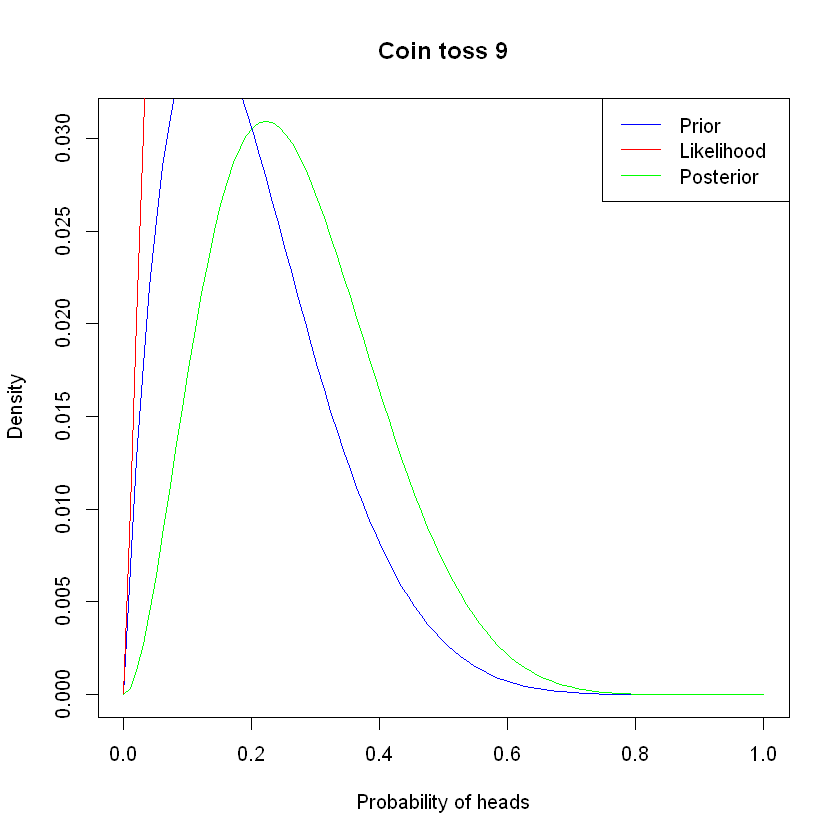

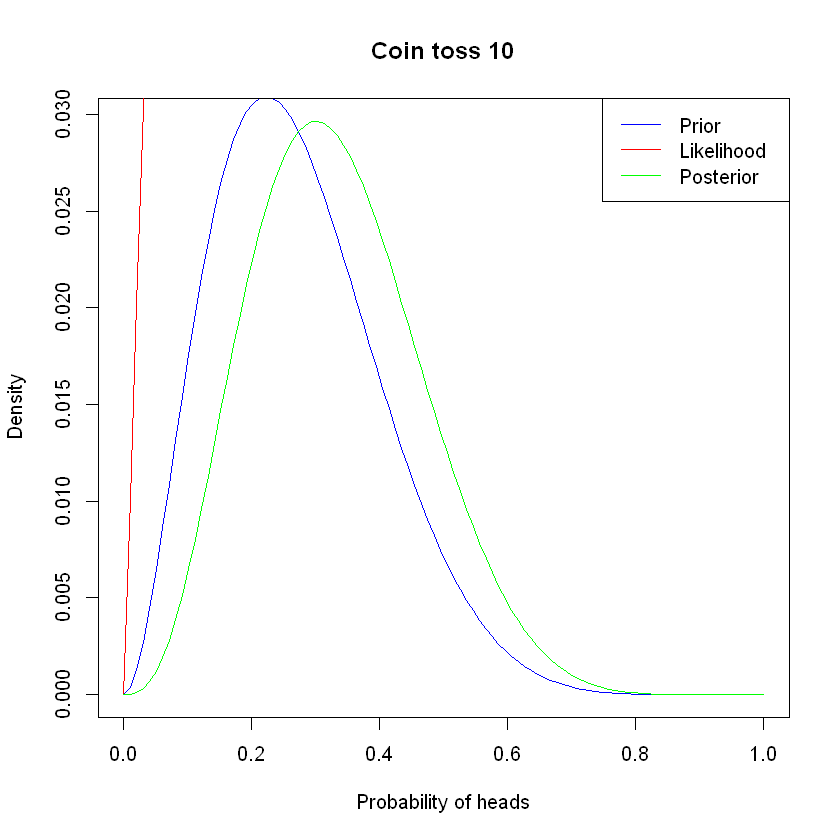

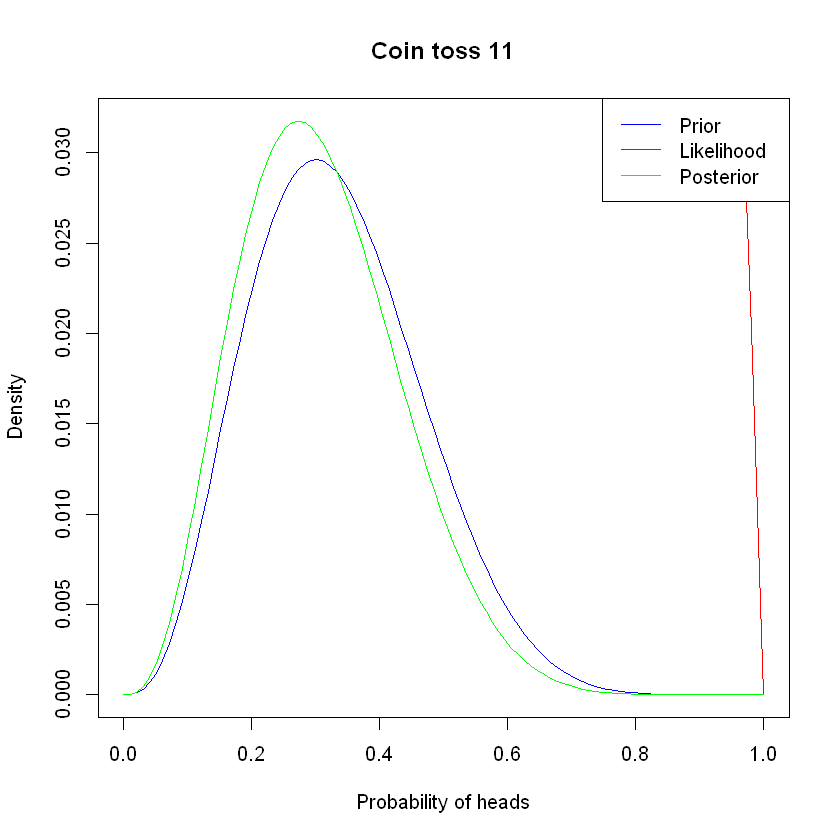

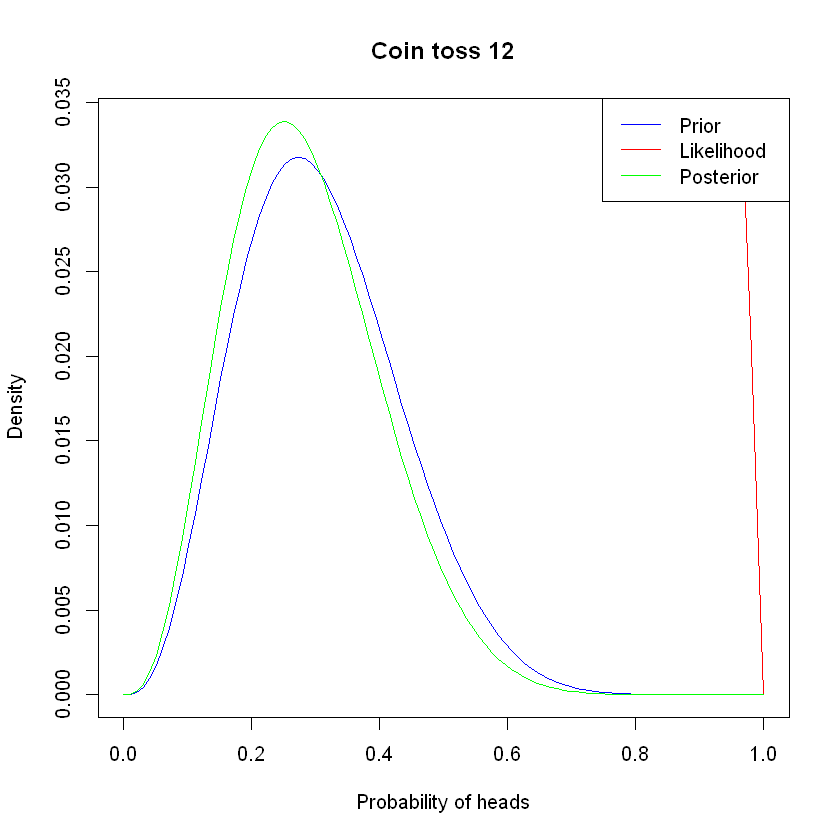

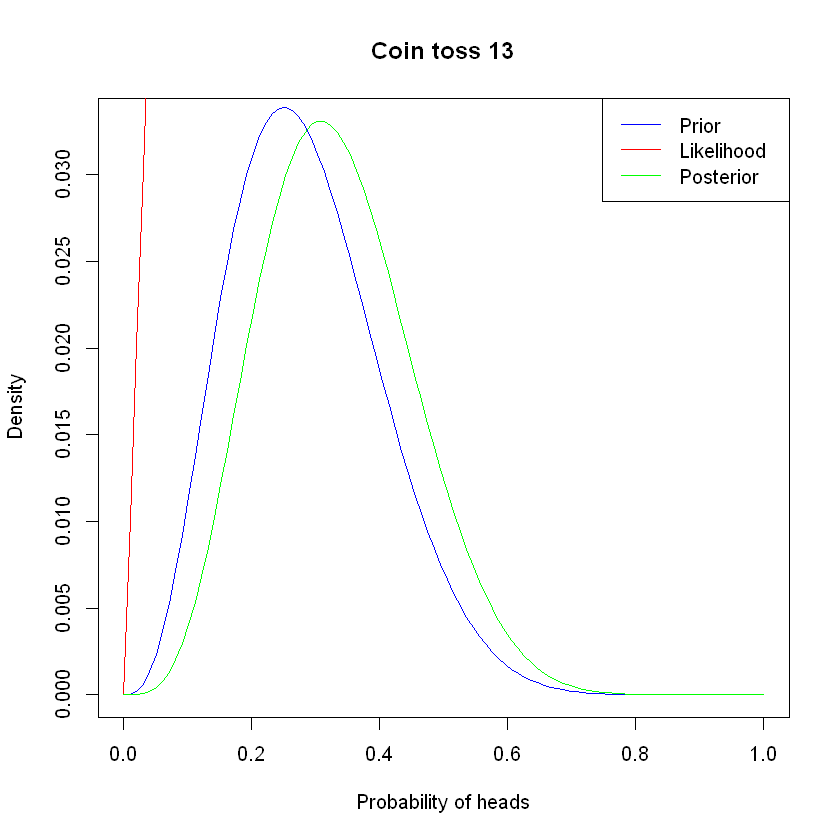

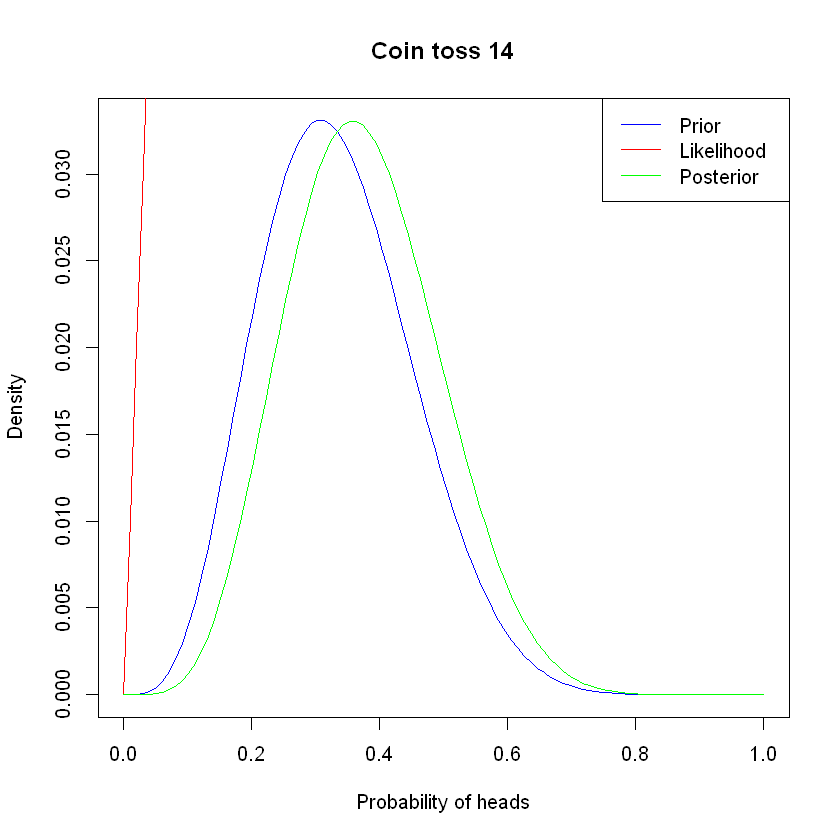

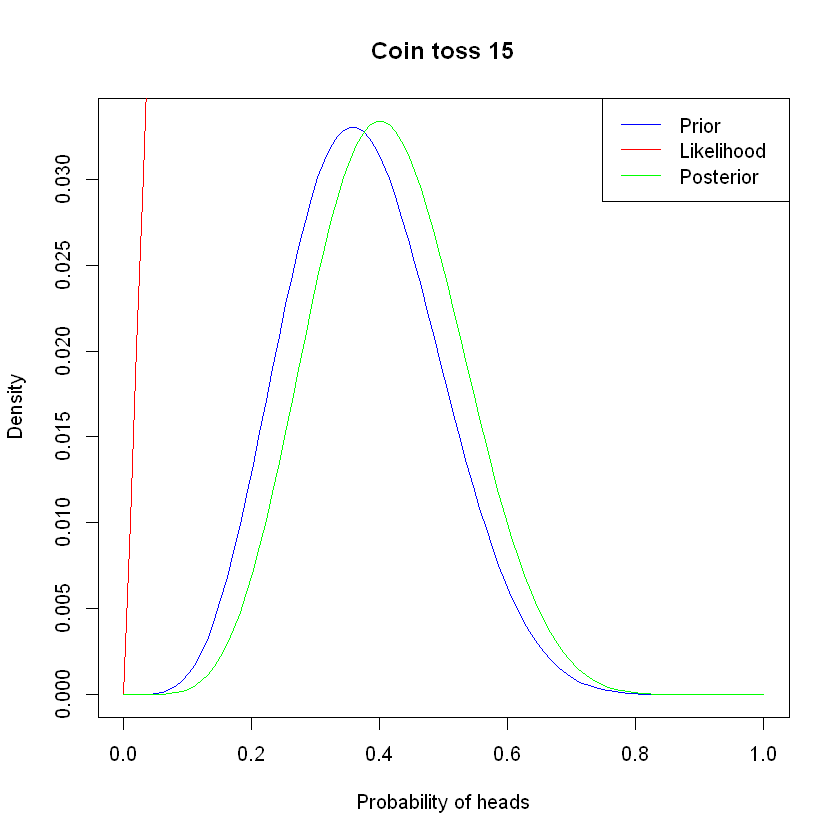

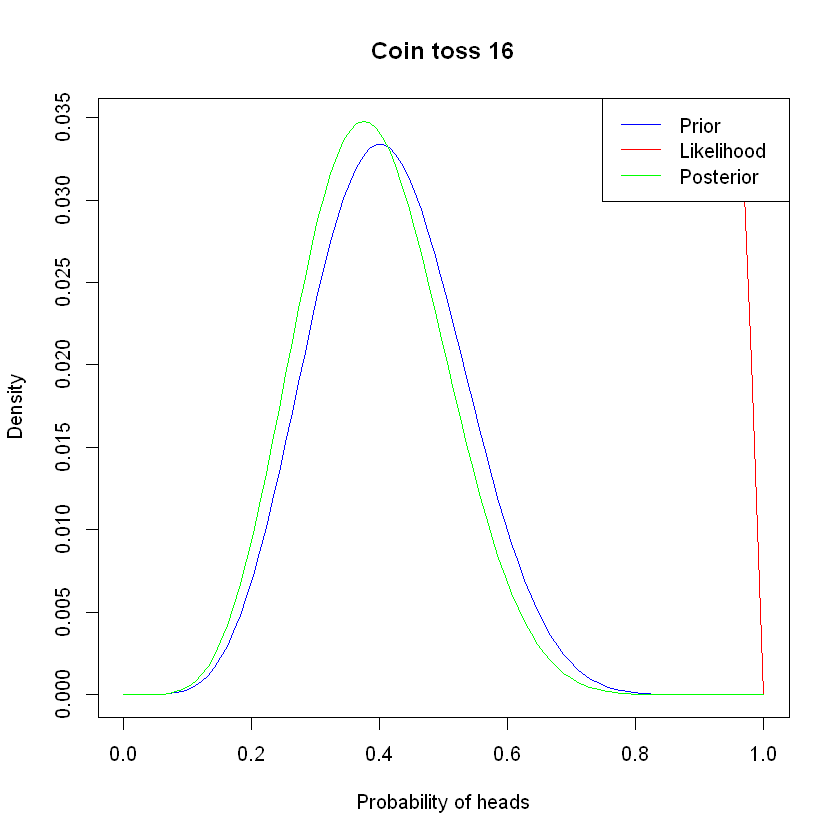

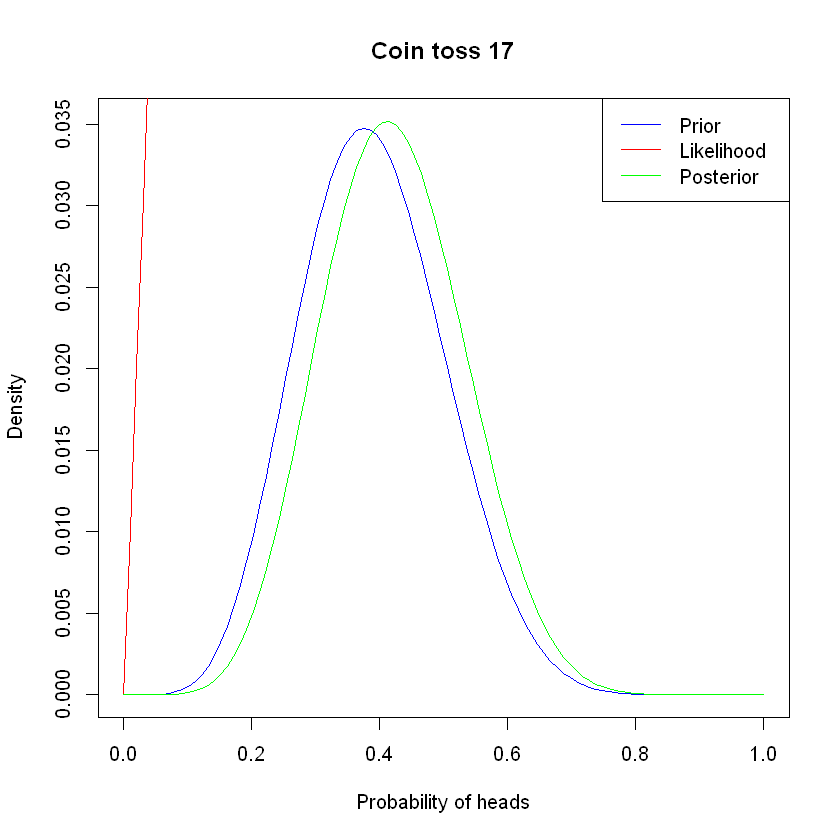

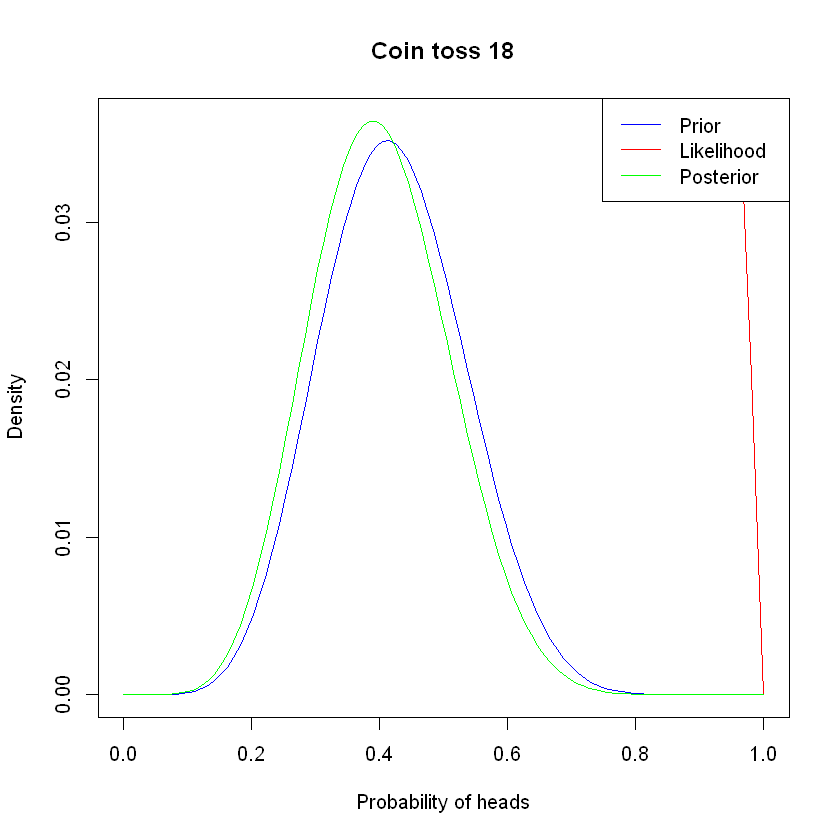

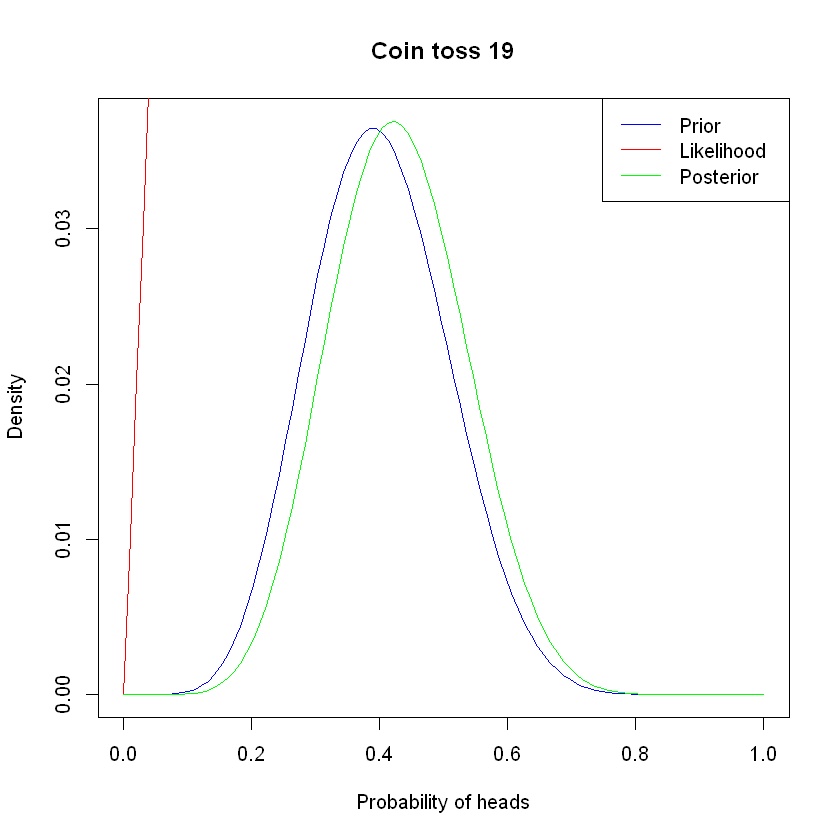

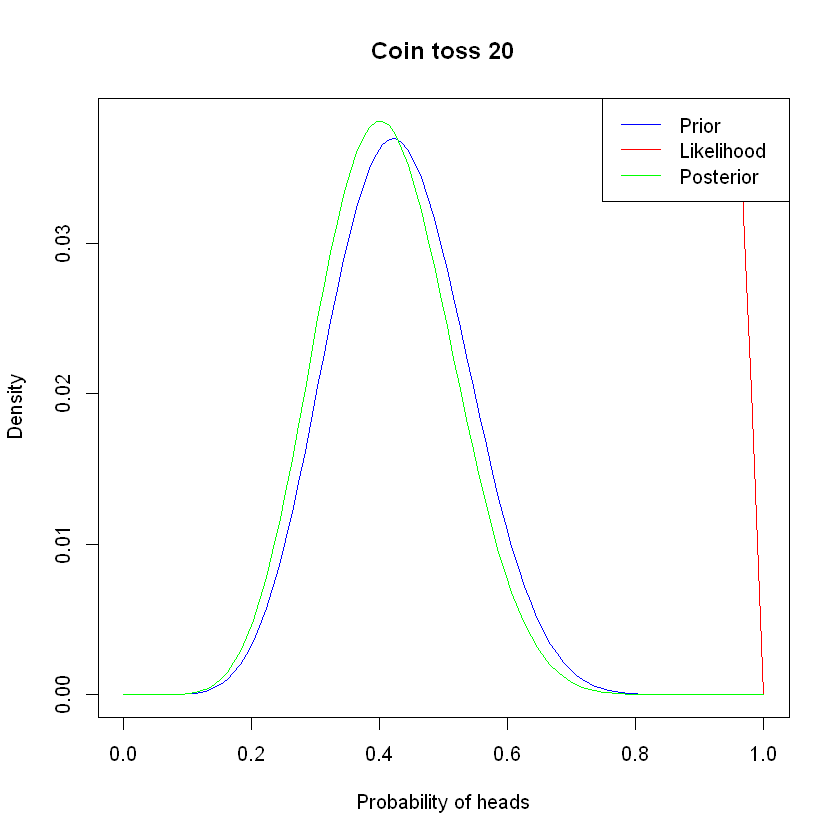

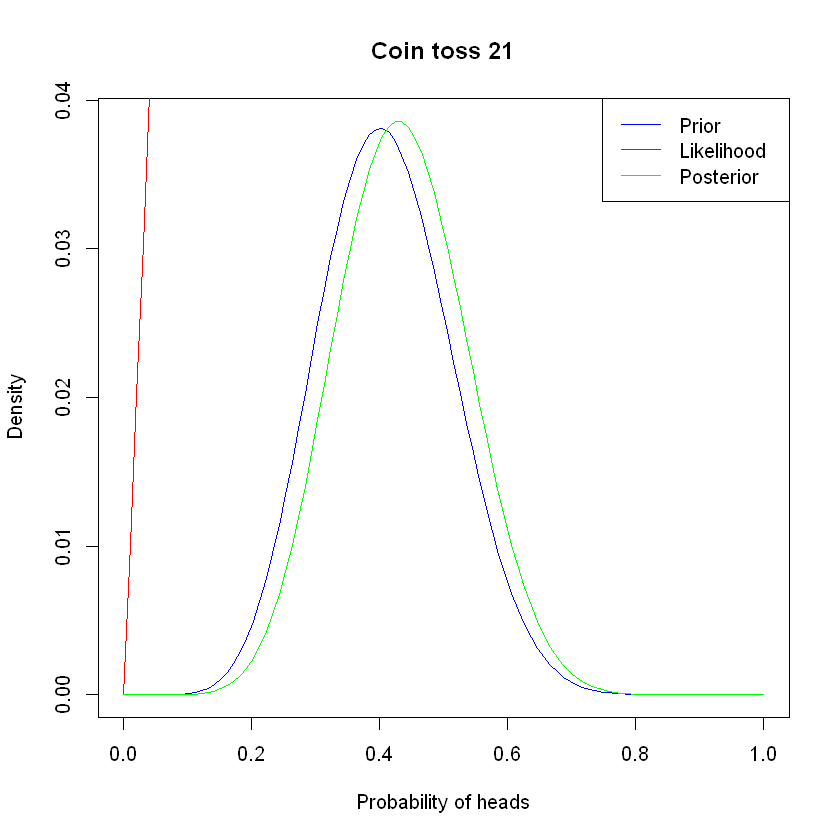

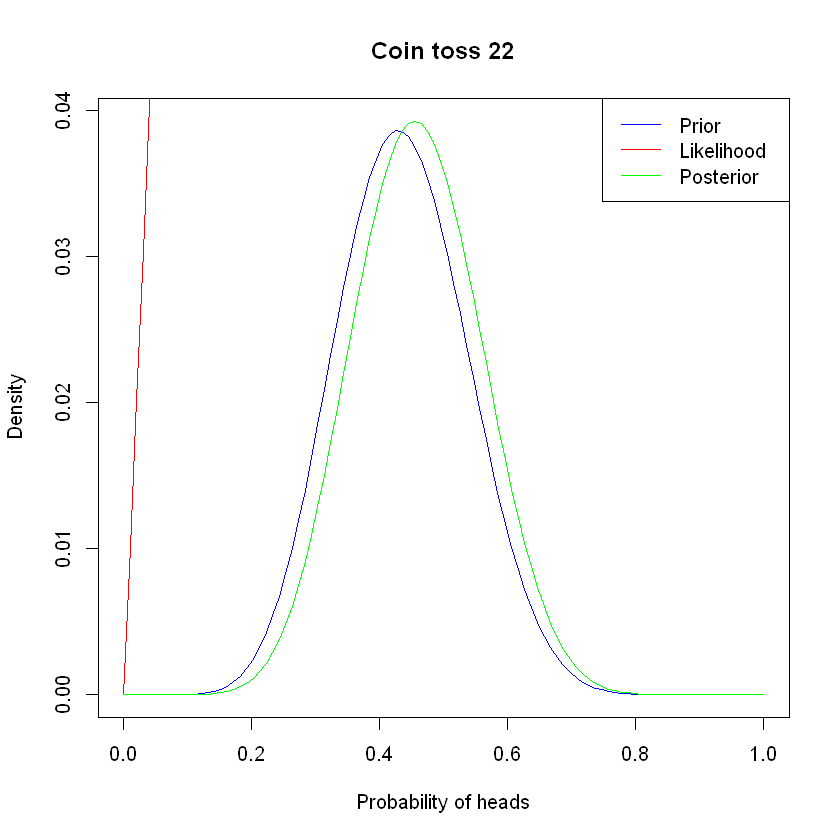

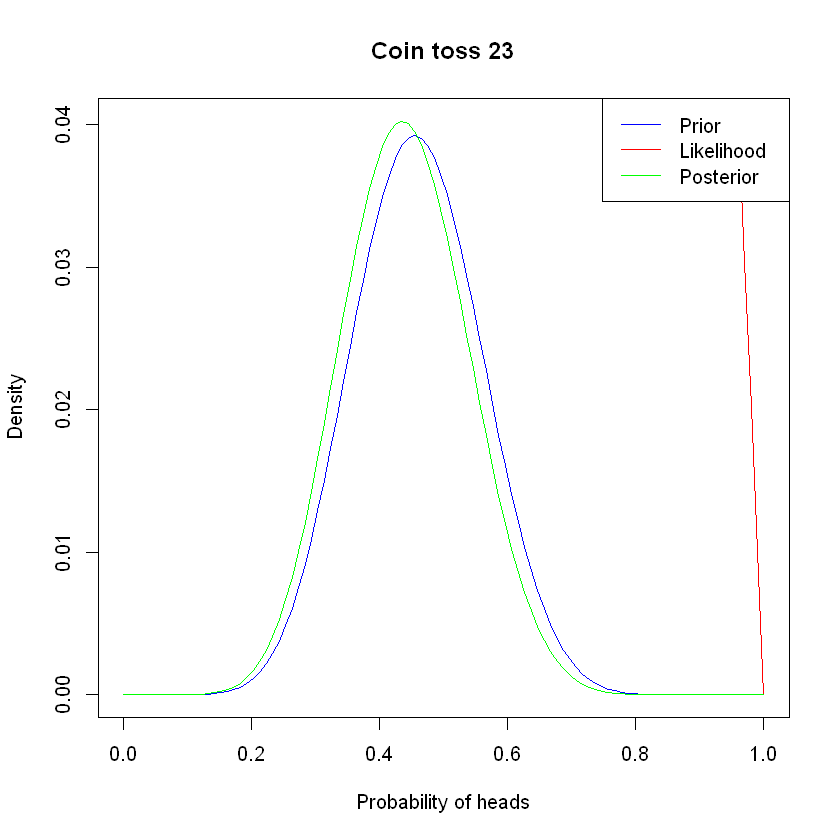

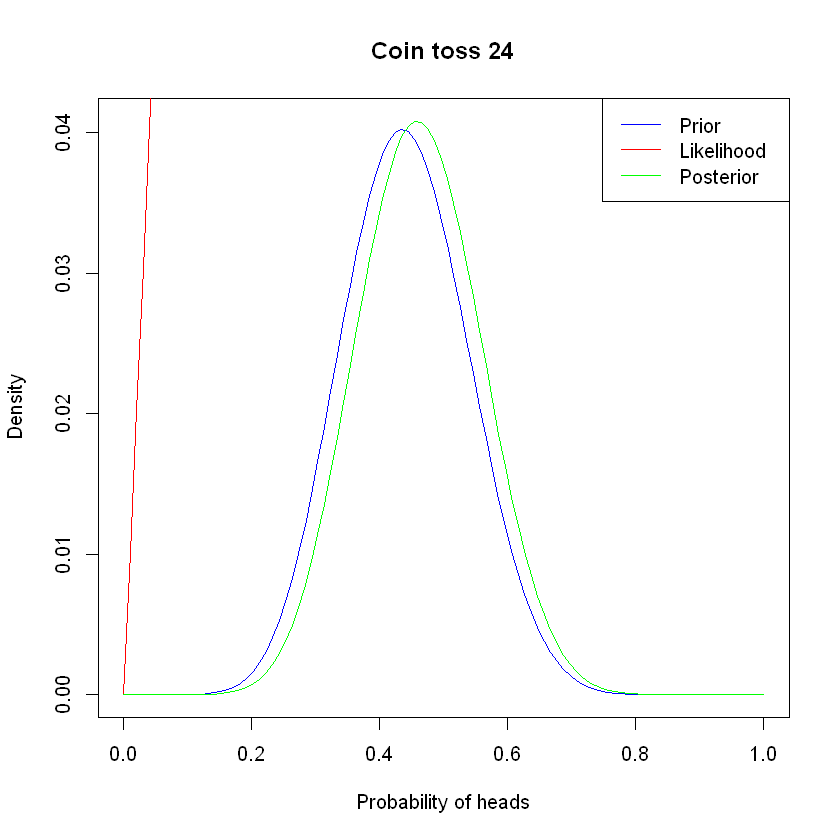

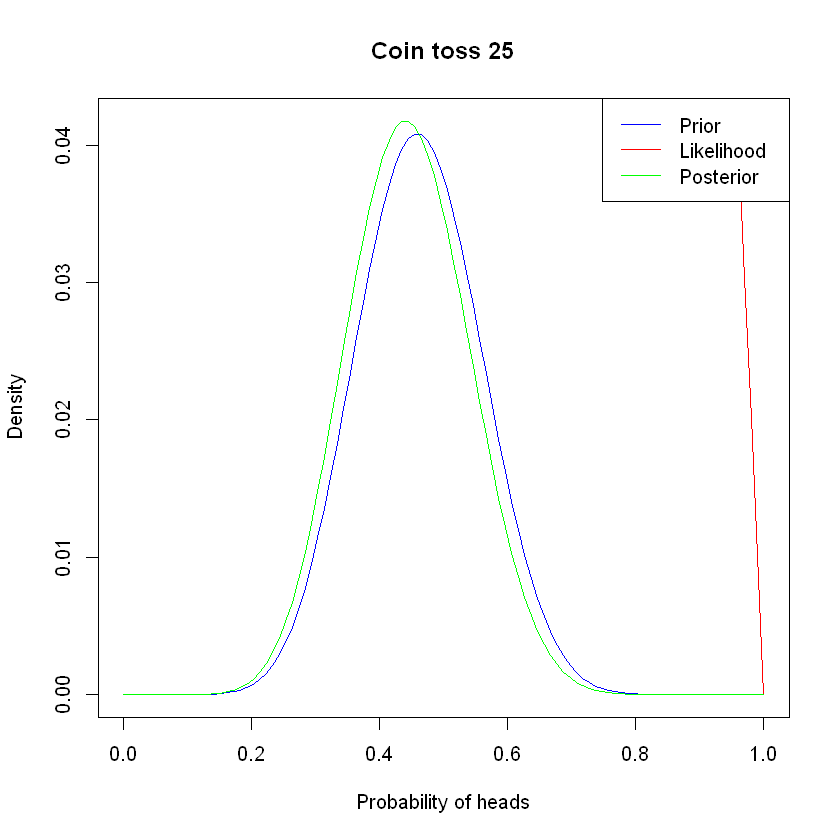

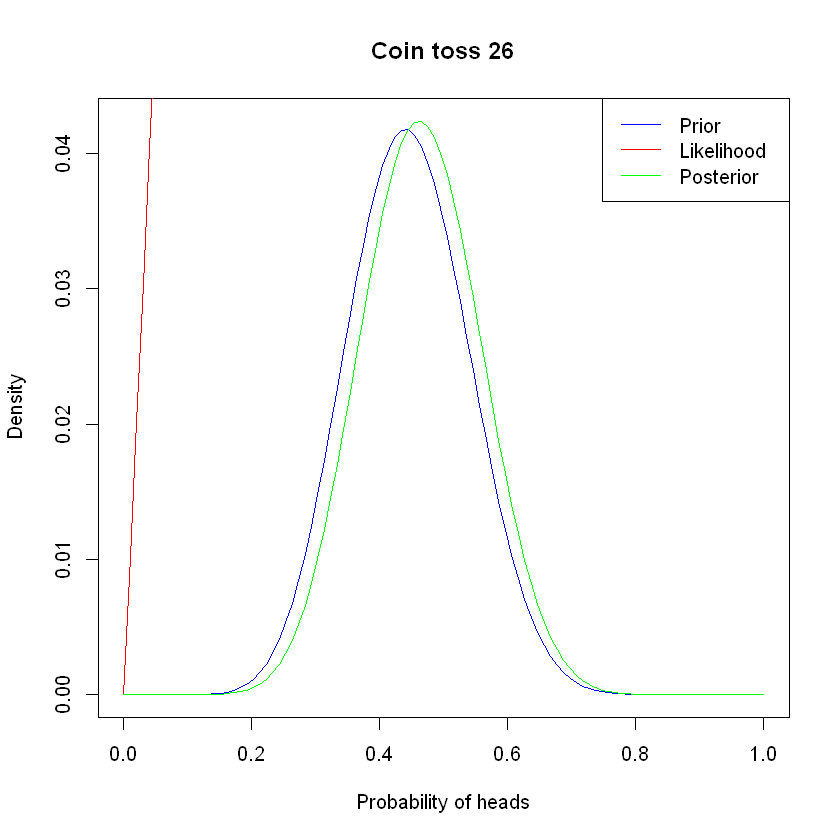

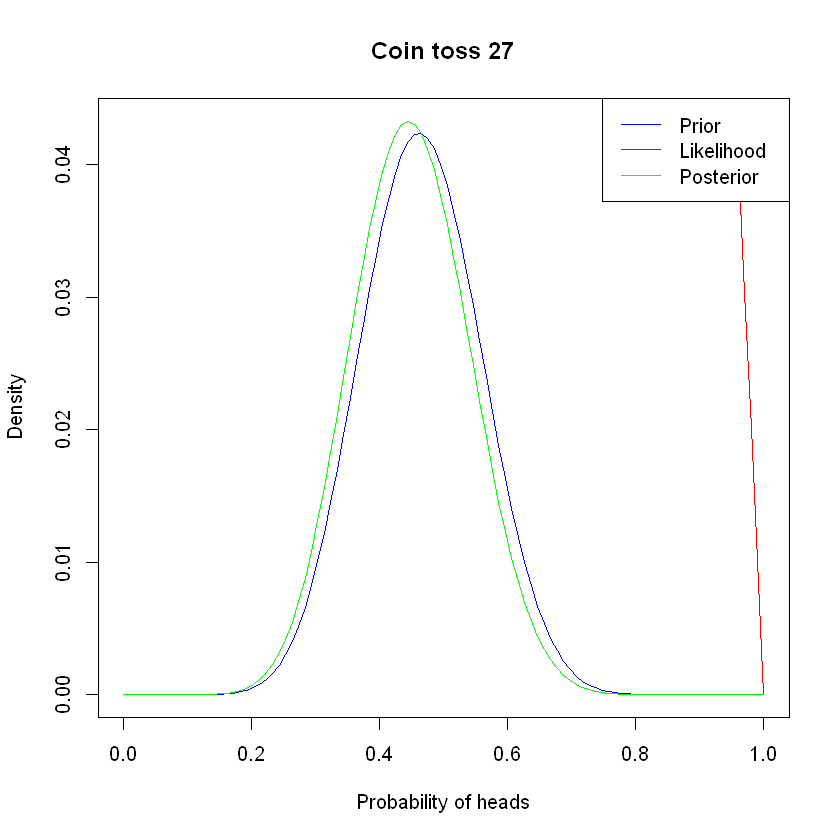

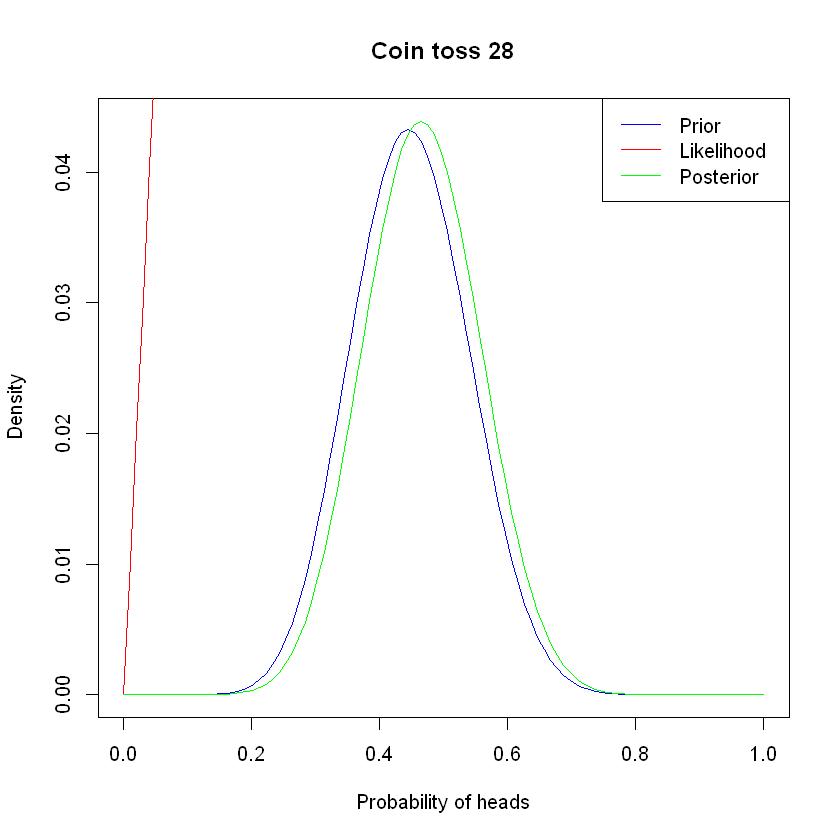

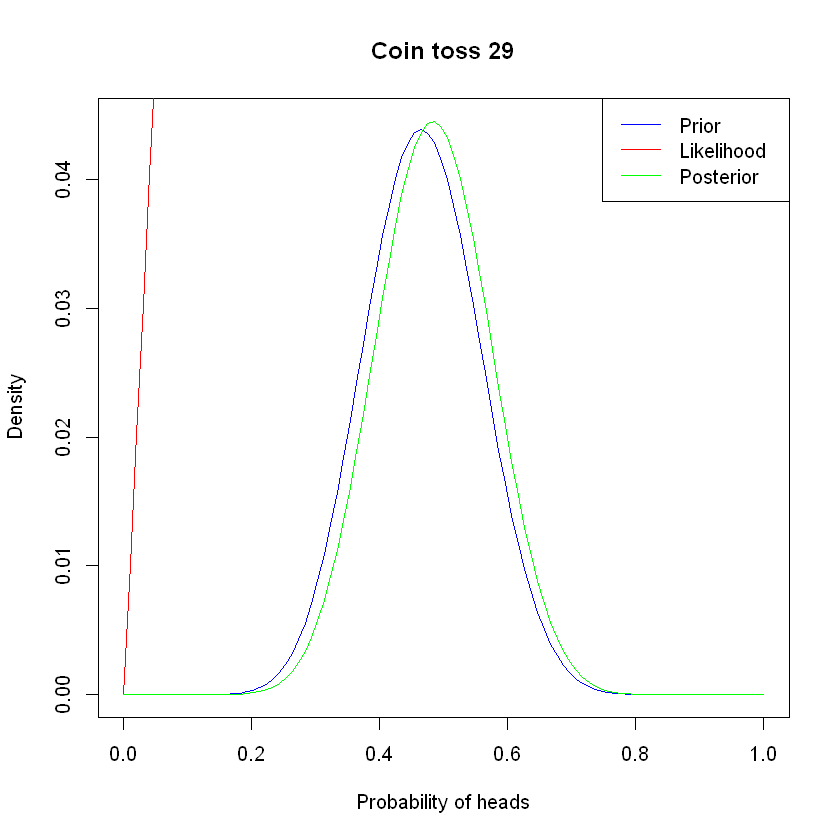

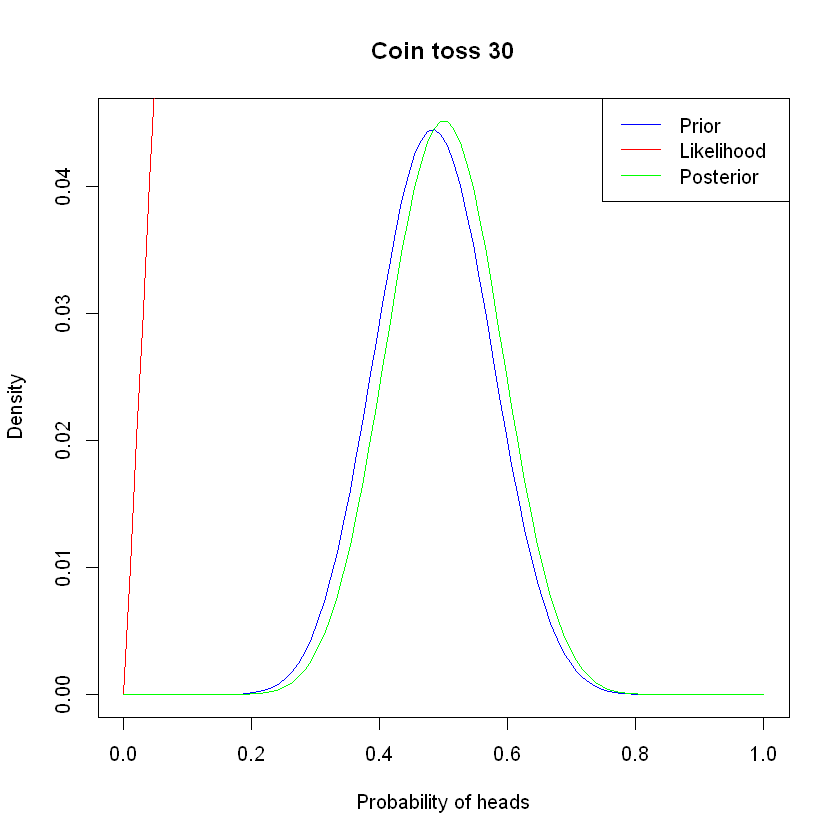

In [4]:
# Set the number of coin tosses
n <- 30

# Set the coin toss outcomes
outcomes <- c(0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
              0 ,1 ,0 ,1 ,1 ,1)

# Define a grid of probability values
p_grid <- seq(from=0,to=1,length.out=100)

# Initialize the prior distribution (assuming a flat prior)
prior <- rep(1,length(p_grid))

# Perform the sequential analysis
for (i in seq_along(outcomes)) {
    # Calculate the likelihood of the data given the probability of heads
    likelihood <- dbinom(outcomes[i],size=1,p=p_grid)
    
    # Calculate the unstandardized posterior distribution
    unstd_posterior <- likelihood * prior
    
    # Standardize the posterior distribution
    posterior <- unstd_posterior / sum(unstd_posterior)
    
    # Plot the prior, likelihood and posterior distributions
    plot(p_grid,prior,type='l',col='blue',ylim=c(0,max(posterior)),xlab='Probability of heads',ylab='Density',main=paste('Coin toss',i))
    lines(p_grid,likelihood,col='red')
    lines(p_grid,posterior,col='green')
    legend('topright',legend=c('Prior','Likelihood','Posterior'),col=c('blue','red','green'),lty=1)
    
    # Update the prior distribution for the next coin toss
    prior <- posterior
    
    # Pause between plots
    Sys.sleep(2)
}

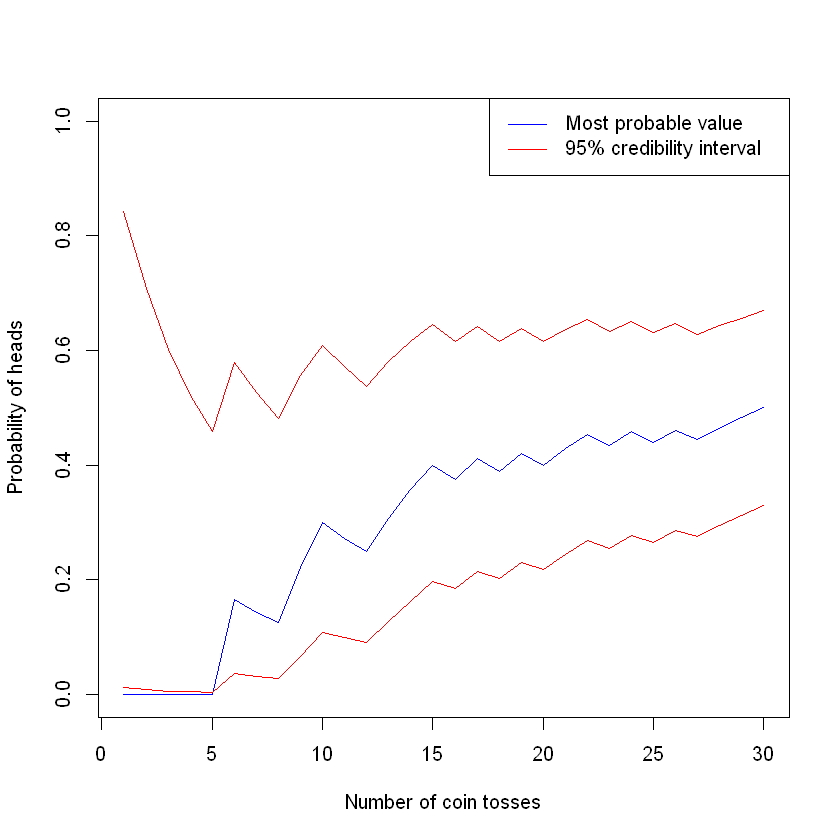

In [3]:
# Set the number of coin tosses
n <- 30

# Set the coin toss outcomes
outcomes <- c(0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
           1 ,1)

# Initialize the prior distribution (assuming a flat prior)
alpha <- 1
beta <- 1

# Initialize vectors to store the most probable value and credibility interval
mpv <- numeric(n)
ci_lower <- numeric(n)
ci_upper <- numeric(n)

# Perform the sequential analysis
for (i in 1:n) {
  # Update the prior distribution with the new information from the latest toss
  if (outcomes[i] == '1') {
      alpha <- alpha + 1
  } else {
    beta <- beta + 1
  }
  
  # Calculate the posterior distribution
  post <- function(p) dbeta(p, alpha, beta)
  
  # Find the most probable value (i.e., the mode of the posterior distribution)
  mode_post <- (alpha - 1)/(alpha + beta - 2)
  mpv[i] <- mode_post
  
  # Calculate the credibility interval
  ci <- qbeta(c(0.025,0.975), alpha, beta)
  ci_lower[i] <- ci[1]
  ci_upper[i] <- ci[2]
}

# Plot the results
plot(mpv, type='l', col='blue', ylim=c(0,1), xlab='Number of coin tosses', ylab='Probability of heads')
lines(ci_lower, col='red')
lines(ci_upper, col='red')
legend('topright', legend=c('Most probable value', '95% credibility interval'), col=c('blue','red'), lty=1)

## Exercise 4- Six Boxes Toy Model : inference

### 1)

Ramdomly chosen box: H_ 2

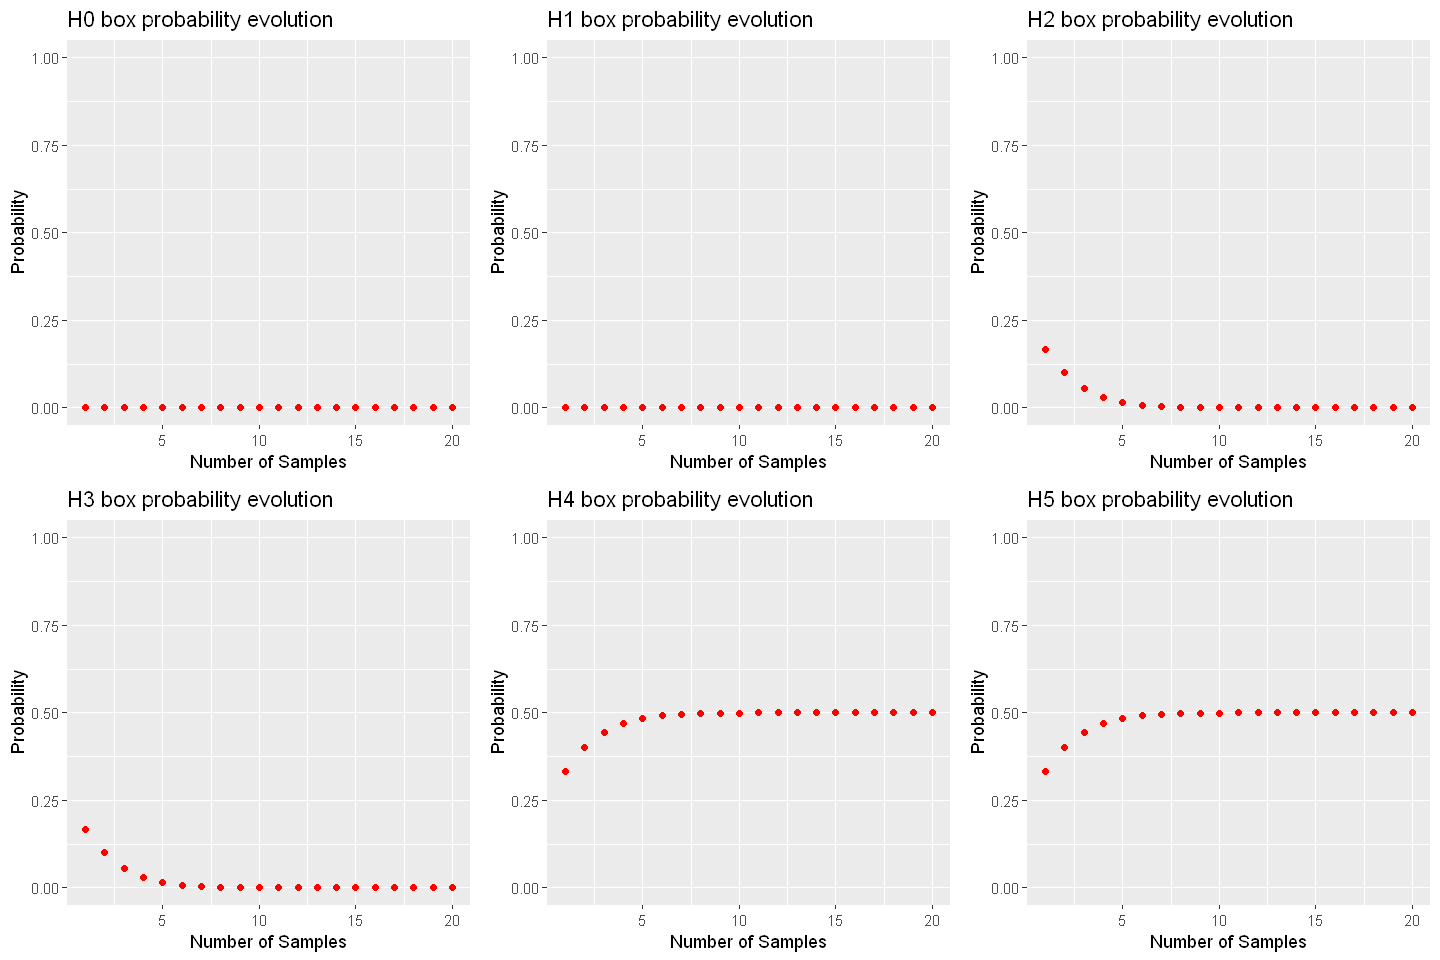

In [50]:
# Define the boxes H_j (where j=1 is white and j=0 black) and number of iterations
j = sample(0:5, 1)
iterations = 20
cat('Ramdomly selected box: H_',j)

# Simulate the extraction of a white/black stone from the box
samples = function(j){
    out = ifelse(runif(length(j)) < j/5, 1, 0)
    return(out)
}

# Calculate the conditional probability of extracting a stone from a box j
# given the color ('sample') of the previously extracted stone
probE_H = function(sample, j){
  ifelse(sample, j/5, (5-j)/5)
}


# Initial probability distribution of each box (uniform)
prob_H = c(1/6, 1/6, 1/6, 1/6, 1/6, 1/6)

prob_H0 = c()
prob_H1 = c()
prob_H2 = c()
prob_H3 = c()
prob_H4 = c()
prob_H5 = c()

#Update the probability of each box for the next extractions
for (x in 1:iterations){
    
    s = sample(j)
    
    
    probE_H0 = c(probE_H(s, 0), probE_H(s, 1), probE_H(s, 2), probE_H(s, 3), probE_H(s, 4), probE_H(s, 5) )
    
    evidence = 0
    for (J in 1:6){
        evidence = evidence + probE_H0[J]*prob_H[J]
    }
# Posterior probability distribution prob_H
    for (J in 1:6){
        prob_H[J] =  probE_H0[J]*prob_H[J]/evidence 
    }
    
    
# Store the posterior probability for each box in separate vectors  
    prob_H0 = c(prob_H0, prob_H[1])
    prob_H1 = c(prob_H1, prob_H[2])
    prob_H2 = c(prob_H2, prob_H[3])
    prob_H3 = c(prob_H3, prob_H[4])
    prob_H4 = c(prob_H4, prob_H[5])
    prob_H5 = c(prob_H5, prob_H[6])

}
p0 = ggplot() + geom_point(aes(x=1:iterations, y=prob_H0), color='red') + labs(title='H0 box probability evolution', x='Number of Samples', y='Probability')+ylim(0,1)+xlim(1,iterations)
p1 = ggplot() + geom_point(aes(x=1:iterations, y=prob_H1), color='red') + labs(title='H1 box probability evolution', x='Number of Samples', y='Probability')+ylim(0,1)+xlim(1,iterations)
p2 = ggplot() + geom_point(aes(x=1:iterations, y=prob_H2), color='red') + labs(title='H2 box probability evolution', x='Number of Samples', y='Probability')+ylim(0,1)+xlim(1,iterations)
p3 = ggplot() + geom_point(aes(x=1:iterations, y=prob_H3), color='red') + labs(title='H3 box probability evolution', x='Number of Samples', y='Probability')+ylim(0,1)+xlim(1,iterations)
p4 = ggplot() + geom_point(aes(x=1:iterations, y=prob_H4), color='red') + labs(title='H4 box probability evolution', x='Number of Samples', y='Probability')+ylim(0,1)+xlim(1,iterations)
p5 = ggplot() + geom_point(aes(x=1:iterations, y=prob_H5), color='red') + labs(title='H5 box probability evolution', x='Number of Samples', y='Probability')+ylim(0,1)+xlim(1,iterations)

grid.arrange(p0, p1, p2, p3, p4, p5, ncol=3, nrow=2)

In [26]:
# Define the boxes and their respective white and black balls
boxes <- c("H0", "H1", "H2", "H3", "H4", "H5")
balls <- data.frame(
  box = boxes,
  white = c(0, 1, 2, 3, 4, 5),
  black = c(5, 4, 3, 2, 1, 0)
)

# Define a function to randomly select a box based on the probabilities of each box
select_box <- function() {
  sample(boxes, 1, prob = rep(1/6, 6))
}

# Define a function to draw a ball from the selected box
draw_ball <- function(box) {
  # Get the number of white and black balls in the box
  white_balls <- balls[balls$box == box, "white"]
  black_balls <- balls[balls$box == box, "black"]
  
  # Sample a ball from the box
  if(runif(1) < 0.5) {
    # Draw a white ball
    balls[balls$box == box, "white"] <- white_balls - 1
    return("white")
  } else {
    # Draw a black ball
    balls[balls$box == box, "black"] <- black_balls - 1
    return("black")
  }
}

# Perform a simulation of the process
# Set the seed for reproducibility
set.seed(123) 
results <- data.frame()
# Set number of iterations i=10
for(i in 1:10) {
  # Select a box
  box <- select_box()
  
  # Draw a ball from the selected box
  ball <- draw_ball(box)
  
  # Add the result to the results data frame
  results <- rbind(results, data.frame(Box = box, Ball = ball))
}
results

Box,Ball
<chr>,<chr>
H2,black
H3,black
H0,white
H4,black
H4,white
H0,white
H5,black
H1,black
H2,white


Box probabilities:
H0 :  0 
H1 :  0.05 
H2 :  0.14 
H3 :  0.22 
H4 :  0.26 
H5 :  0.32 


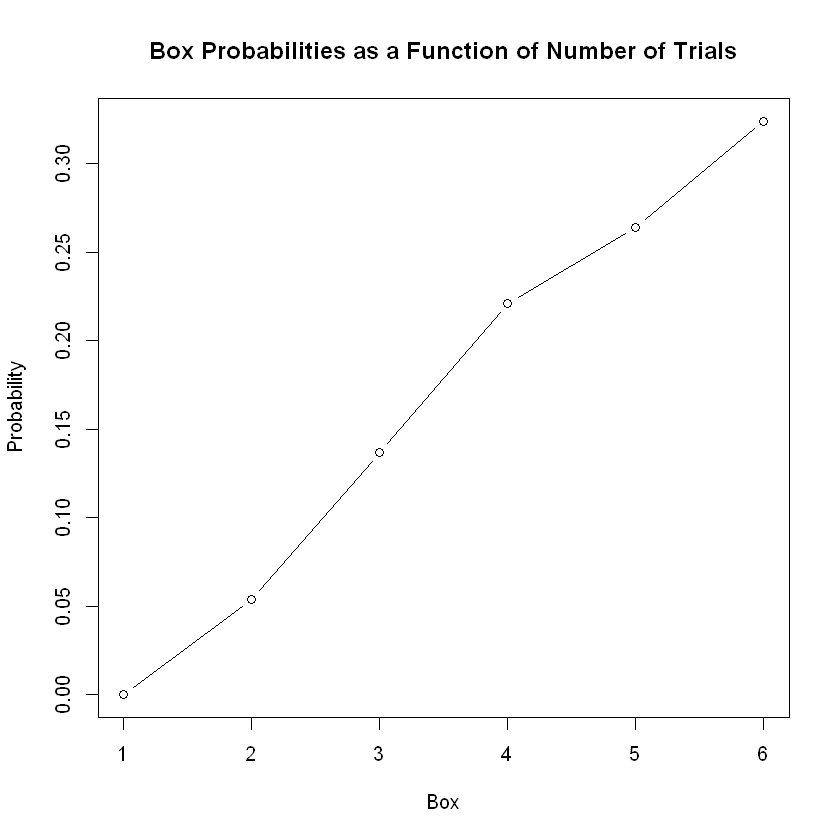

In [15]:
# Set the number of trials
num_trials <- 1000

# Set the number of balls in each box
num_balls <- 5

# Create a vector to store the box probabilities
box_prob <- rep(0, num_balls + 1)

# Label the boxes
box_labels <- paste0("H", 0:num_balls)

# Run the simulation
for (i in 1:num_trials) {
  # Select a random box
  box <- sample(box_labels, 1)
  
  # Make a random sampling from the box
    white_balls <- as.numeric(strsplit(box, "")[[1]][2])
  black_balls <- num_balls - white_balls
  balls <- c(rep("W", white_balls), rep("B", black_balls))
  sample_ball <- sample(balls, 1)
  
  # Update the box probabilities
  if (sample_ball == "W") {
    box_prob[white_balls + 1] <- box_prob[white_balls + 1] + 1
  } else {
    box_prob[black_balls + 1] <- box_prob[black_balls + 1] + 1
  }
}

# Calculate the final box probabilities
box_prob <- box_prob / sum(box_prob)

# Print the box probabilities
cat("Box probabilities:\n")
for (i in 1:length(box_prob)) {
  cat(box_labels[i], ": ", round(box_prob[i], digits = 2), "\n")
}

# Plot the box probabilities as a function of the number of trials
plot(box_prob ~ seq_along(box_prob), type = "b", xlab = "Box", ylab = "Probability", main = "Box Probabilities as a Function of Number of Trials")